In [20]:
import cv2
import numpy as np
import os
import random
import json
import matplotlib.pyplot as plt
import shutil

In [24]:
rgb_images = 'rgb_images'
thr_images = 'thr_images'

num_images = len(os.listdir(rgb_images))

img_list = os.listdir(rgb_images)
random.shuffle(img_list)

train_list = img_list[:num_images - 600]
val_list = img_list[-600:]

In [25]:
os.mkdir('train_rgb_input')
os.mkdir('train_thr_template')
for im in train_list:
    shutil.move(
        os.path.join(rgb_images, im),
        os.path.join('train_rgb_input', im)
    )
    shutil.move(
        os.path.join(thr_images, im),
        os.path.join('train_thr_template', im)
    )

In [28]:
os.mkdir('val_rgb_input')
os.mkdir('val_thr_template')
for im in val_list:
    shutil.move(
        os.path.join(rgb_images, im),
        os.path.join('val_rgb_input', im)
    )
    shutil.move(
        os.path.join(thr_images, im),
        os.path.join('val_thr_template', im)
    )

In [29]:
train_rgb = 'train_rgb_input'
train_thr = 'train_thr_template'

rgb = cv2.imread(os.path.join(train_rgb, os.listdir(train_rgb)[0]))
thr =  cv2.imread(os.path.join(train_thr, os.listdir(train_rgb)[0]))

In [2]:
!ls homography/homography_rgb_val

1_1_1_1_1.png	 1_1_1_3_284.png  1_1_1_5_691.png  1_1_1_7_746.png
1_1_1_1_106.png  1_1_1_3_285.png  1_1_1_5_693.png  1_1_1_7_751.png
1_1_1_1_116.png  1_1_1_3_296.png  1_1_1_5_695.png  1_1_1_7_754.png
1_1_1_1_130.png  1_1_1_3_31.png   1_1_1_5_698.png  1_1_1_7_787.png
1_1_1_1_133.png  1_1_1_3_321.png  1_1_1_5_701.png  1_1_1_7_788.png
1_1_1_1_165.png  1_1_1_3_322.png  1_1_1_5_715.png  1_1_1_7_789.png
1_1_1_1_189.png  1_1_1_3_324.png  1_1_1_5_717.png  1_1_1_7_79.png
1_1_1_1_209.png  1_1_1_3_330.png  1_1_1_5_719.png  1_1_1_7_792.png
1_1_1_1_211.png  1_1_1_3_335.png  1_1_1_5_722.png  1_1_1_7_798.png
1_1_1_1_227.png  1_1_1_3_353.png  1_1_1_5_727.png  1_1_1_7_804.png
1_1_1_1_23.png	 1_1_1_3_383.png  1_1_1_5_743.png  1_1_1_7_814.png
1_1_1_1_24.png	 1_1_1_3_391.png  1_1_1_5_759.png  1_1_1_7_815.png
1_1_1_1_246.png  1_1_1_3_397.png  1_1_1_5_76.png   1_1_1_7_827.png
1_1_1_1_251.png  1_1_1_3_40.png   1_1_1_5_762.png  1_1_1_7_828.png
1_1_1_1_256.png  1_1_1_3_403.png  1_1_1_5_767.png  1_1_1_7_83.png
1

In [9]:
'''
OPTIONAL: change image files to have the same names
'''
dirs = ['homography/homography_rgb_train', 'homography/homography_thr_train/', 'homography/homography_rgb_val/', 'homography/homography_thr_val/']

for d in dirs:
    imgs = os.listdir(d)
    for img in imgs:
        print(img)
        os.rename(
            os.path.join(d, img),
            os.path.join(d, os.path.splitext(img)[0].rsplit('_', 1)[0] + '.png')
                 )

1_1_1_1_10_3.png
1_1_1_1_100_3.png
1_1_1_1_101_3.png
1_1_1_1_102_3.png
1_1_1_1_103_3.png
1_1_1_1_104_3.png
1_1_1_1_105_3.png
1_1_1_1_107_3.png
1_1_1_1_108_3.png
1_1_1_1_109_3.png
1_1_1_1_11_3.png
1_1_1_1_110_3.png
1_1_1_1_111_3.png
1_1_1_1_112_3.png
1_1_1_1_113_3.png
1_1_1_1_114_3.png
1_1_1_1_115_3.png
1_1_1_1_117_3.png
1_1_1_1_118_3.png
1_1_1_1_119_3.png
1_1_1_1_12_3.png
1_1_1_1_120_3.png
1_1_1_1_121_3.png
1_1_1_1_122_3.png
1_1_1_1_123_3.png
1_1_1_1_124_3.png
1_1_1_1_125_3.png
1_1_1_1_126_3.png
1_1_1_1_127_3.png
1_1_1_1_128_3.png
1_1_1_1_129_3.png
1_1_1_1_13_3.png
1_1_1_1_131_3.png
1_1_1_1_132_3.png
1_1_1_1_134_3.png
1_1_1_1_135_3.png
1_1_1_1_136_3.png
1_1_1_1_137_3.png
1_1_1_1_138_3.png
1_1_1_1_139_3.png
1_1_1_1_14_3.png
1_1_1_1_140_3.png
1_1_1_1_141_3.png
1_1_1_1_142_3.png
1_1_1_1_143_3.png
1_1_1_1_144_3.png
1_1_1_1_145_3.png
1_1_1_1_146_3.png
1_1_1_1_147_3.png
1_1_1_1_148_3.png
1_1_1_1_149_3.png
1_1_1_1_15_3.png
1_1_1_1_150_3.png
1_1_1_1_151_3.png
1_1_1_1_152_3.png
1_1_1_1_153_3.pn

1_1_1_5_690_3.png
1_1_1_5_692_3.png
1_1_1_5_694_3.png
1_1_1_5_696_3.png
1_1_1_5_697_3.png
1_1_1_5_699_3.png
1_1_1_5_7_3.png
1_1_1_5_70_3.png
1_1_1_5_700_3.png
1_1_1_5_702_3.png
1_1_1_5_703_3.png
1_1_1_5_704_3.png
1_1_1_5_705_3.png
1_1_1_5_706_3.png
1_1_1_5_707_3.png
1_1_1_5_708_3.png
1_1_1_5_709_3.png
1_1_1_5_71_3.png
1_1_1_5_710_3.png
1_1_1_5_711_3.png
1_1_1_5_712_3.png
1_1_1_5_713_3.png
1_1_1_5_714_3.png
1_1_1_5_716_3.png
1_1_1_5_718_3.png
1_1_1_5_72_3.png
1_1_1_5_720_3.png
1_1_1_5_721_3.png
1_1_1_5_723_3.png
1_1_1_5_724_3.png
1_1_1_5_725_3.png
1_1_1_5_726_3.png
1_1_1_5_728_3.png
1_1_1_5_729_3.png
1_1_1_5_73_3.png
1_1_1_5_730_3.png
1_1_1_5_731_3.png
1_1_1_5_732_3.png
1_1_1_5_733_3.png
1_1_1_5_734_3.png
1_1_1_5_735_3.png
1_1_1_5_736_3.png
1_1_1_5_737_3.png
1_1_1_5_738_3.png
1_1_1_5_739_3.png
1_1_1_5_74_3.png
1_1_1_5_740_3.png
1_1_1_5_741_3.png
1_1_1_5_742_3.png
1_1_1_5_744_3.png
1_1_1_5_745_3.png
1_1_1_5_746_3.png
1_1_1_5_747_3.png
1_1_1_5_748_3.png
1_1_1_5_749_3.png
1_1_1_5_75_3.png


1_1_1_9_759_3.png
1_1_1_9_76_3.png
1_1_1_9_760_3.png
1_1_1_9_761_3.png
1_1_1_9_762_3.png
1_1_1_9_765_3.png
1_1_1_9_766_3.png
1_1_1_9_767_3.png
1_1_1_9_768_3.png
1_1_1_9_769_3.png
1_1_1_9_77_3.png
1_1_1_9_770_3.png
1_1_1_9_771_3.png
1_1_1_9_772_3.png
1_1_1_9_773_3.png
1_1_1_9_774_3.png
1_1_1_9_775_3.png
1_1_1_9_776_3.png
1_1_1_9_777_3.png
1_1_1_9_778_3.png
1_1_1_9_779_3.png
1_1_1_9_78_3.png
1_1_1_9_781_3.png
1_1_1_9_782_3.png
1_1_1_9_783_3.png
1_1_1_9_784_3.png
1_1_1_9_785_3.png
1_1_1_9_786_3.png
1_1_1_9_787_3.png
1_1_1_9_788_3.png
1_1_1_9_789_3.png
1_1_1_9_79_3.png
1_1_1_9_790_3.png
1_1_1_9_791_3.png
1_1_1_9_792_3.png
1_1_1_9_793_3.png
1_1_1_9_794_3.png
1_1_1_9_795_3.png
1_1_1_9_796_3.png
1_1_1_9_798_3.png
1_1_1_9_799_3.png
1_1_1_9_8_3.png
1_1_1_9_80_3.png
1_1_1_9_800_3.png
1_1_1_9_801_3.png
1_1_1_9_802_3.png
1_1_1_9_804_3.png
1_1_1_9_805_3.png
1_1_1_9_806_3.png
1_1_1_9_807_3.png
1_1_1_9_809_3.png
1_1_1_9_81_3.png
1_1_1_9_810_3.png
1_1_1_9_811_3.png
1_1_1_9_813_3.png
1_1_1_9_814_3.png


1_1_1_5_246_1.png
1_1_1_5_247_1.png
1_1_1_5_248_1.png
1_1_1_5_249_1.png
1_1_1_5_25_1.png
1_1_1_5_250_1.png
1_1_1_5_251_1.png
1_1_1_5_252_1.png
1_1_1_5_253_1.png
1_1_1_5_254_1.png
1_1_1_5_255_1.png
1_1_1_5_256_1.png
1_1_1_5_257_1.png
1_1_1_5_26_1.png
1_1_1_5_260_1.png
1_1_1_5_261_1.png
1_1_1_5_262_1.png
1_1_1_5_263_1.png
1_1_1_5_264_1.png
1_1_1_5_265_1.png
1_1_1_5_267_1.png
1_1_1_5_268_1.png
1_1_1_5_269_1.png
1_1_1_5_27_1.png
1_1_1_5_270_1.png
1_1_1_5_271_1.png
1_1_1_5_273_1.png
1_1_1_5_274_1.png
1_1_1_5_275_1.png
1_1_1_5_276_1.png
1_1_1_5_277_1.png
1_1_1_5_278_1.png
1_1_1_5_28_1.png
1_1_1_5_280_1.png
1_1_1_5_281_1.png
1_1_1_5_282_1.png
1_1_1_5_283_1.png
1_1_1_5_284_1.png
1_1_1_5_285_1.png
1_1_1_5_286_1.png
1_1_1_5_287_1.png
1_1_1_5_288_1.png
1_1_1_5_289_1.png
1_1_1_5_29_1.png
1_1_1_5_290_1.png
1_1_1_5_292_1.png
1_1_1_5_293_1.png
1_1_1_5_294_1.png
1_1_1_5_295_1.png
1_1_1_5_298_1.png
1_1_1_5_3_1.png
1_1_1_5_30_1.png
1_1_1_5_300_1.png
1_1_1_5_301_1.png
1_1_1_5_302_1.png
1_1_1_5_303_1.png


1_1_1_8_515_1.png
1_1_1_8_516_1.png
1_1_1_8_517_1.png
1_1_1_8_518_1.png
1_1_1_8_519_1.png
1_1_1_8_520_1.png
1_1_1_8_521_1.png
1_1_1_8_522_1.png
1_1_1_8_523_1.png
1_1_1_8_524_1.png
1_1_1_8_526_1.png
1_1_1_8_527_1.png
1_1_1_8_53_1.png
1_1_1_8_530_1.png
1_1_1_8_531_1.png
1_1_1_8_532_1.png
1_1_1_8_533_1.png
1_1_1_8_535_1.png
1_1_1_8_536_1.png
1_1_1_8_537_1.png
1_1_1_8_538_1.png
1_1_1_8_539_1.png
1_1_1_8_54_1.png
1_1_1_8_540_1.png
1_1_1_8_541_1.png
1_1_1_8_543_1.png
1_1_1_8_544_1.png
1_1_1_8_545_1.png
1_1_1_8_546_1.png
1_1_1_8_547_1.png
1_1_1_8_549_1.png
1_1_1_8_55_1.png
1_1_1_8_550_1.png
1_1_1_8_551_1.png
1_1_1_8_552_1.png
1_1_1_8_553_1.png
1_1_1_8_554_1.png
1_1_1_8_555_1.png
1_1_1_8_556_1.png
1_1_1_8_557_1.png
1_1_1_8_558_1.png
1_1_1_8_559_1.png
1_1_1_8_56_1.png
1_1_1_8_560_1.png
1_1_1_8_561_1.png
1_1_1_8_562_1.png
1_1_1_8_563_1.png
1_1_1_8_564_1.png
1_1_1_8_565_1.png
1_1_1_8_566_1.png
1_1_1_8_567_1.png
1_1_1_8_568_1.png
1_1_1_8_569_1.png
1_1_1_8_57_1.png
1_1_1_8_570_1.png
1_1_1_8_571_1.p

1_1_1_6_629_1.png
1_1_1_6_641_1.png
1_1_1_6_649_1.png
1_1_1_6_651_1.png
1_1_1_6_654_1.png
1_1_1_6_660_1.png
1_1_1_6_665_1.png
1_1_1_6_668_1.png
1_1_1_6_671_1.png
1_1_1_6_683_1.png
1_1_1_6_684_1.png
1_1_1_6_69_1.png
1_1_1_6_7_1.png
1_1_1_6_701_1.png
1_1_1_6_703_1.png
1_1_1_6_706_1.png
1_1_1_6_707_1.png
1_1_1_6_71_1.png
1_1_1_6_714_1.png
1_1_1_6_727_1.png
1_1_1_6_731_1.png
1_1_1_6_734_1.png
1_1_1_6_744_1.png
1_1_1_6_75_1.png
1_1_1_6_760_1.png
1_1_1_6_769_1.png
1_1_1_6_77_1.png
1_1_1_6_771_1.png
1_1_1_6_779_1.png
1_1_1_6_783_1.png
1_1_1_6_790_1.png
1_1_1_6_793_1.png
1_1_1_6_798_1.png
1_1_1_6_801_1.png
1_1_1_6_802_1.png
1_1_1_6_808_1.png
1_1_1_6_814_1.png
1_1_1_6_819_1.png
1_1_1_6_824_1.png
1_1_1_6_835_1.png
1_1_1_6_841_1.png
1_1_1_6_848_1.png
1_1_1_6_859_1.png
1_1_1_6_86_1.png
1_1_1_6_87_1.png
1_1_1_6_874_1.png
1_1_1_6_877_1.png
1_1_1_6_893_1.png
1_1_1_6_9_1.png
1_1_1_6_93_1.png
1_1_1_7_103_1.png
1_1_1_7_110_1.png
1_1_1_7_111_1.png
1_1_1_7_113_1.png
1_1_1_7_119_1.png
1_1_1_7_122_1.png
1_1

In [34]:
'''
warp thermal images for training set
'''
thermal_train = './homography/homography_thr_train'
rgb_train = './homography/homography_rgb_train'

if not (os.path.exists('./train_thr_template')):
    os.mkdir('./train_thr_template')
if not (os.path.exists('./train_labels')):
    os.mkdir('./train_labels')
if not (os.path.exists('./train_rgb_input')):
    os.mkdir('./train_rgb_input')

for img_file in os.listdir(thermal_train):
    print(img_file)
    thr_img = cv2.imread(os.path.join(thermal_train, img_file))
    rgb_img = cv2.imread(os.path.join(rgb_train, img_file))
    # crop the width such that it becomes a square
    height, width, channels = rgb_img.shape

    width_to_crop_per_side = (width - height) // 2
    rgb_img_sqr = rgb_img.copy()[:, width_to_crop_per_side:width - width_to_crop_per_side]
    thr_img_sqr = thr_img.copy()[:, width_to_crop_per_side:width - width_to_crop_per_side]
    # follow resizing of research paper
    rgb_img_resized = cv2.resize(rgb_img_sqr, (192, 192), interpolation=cv2.INTER_AREA)
    thr_img_resized = cv2.resize(thr_img_sqr, (192, 192), interpolation=cv2.INTER_AREA)
    # save new RGB image to input/
    cv2.imwrite(os.path.join('./train_rgb_input', img_file), rgb_img_resized)
    
    # get random points from corner boxes
    top_left_box_u=random.randint(22,41)
    top_left_box_v=random.randint(22,41)

    top_right_box_u=random.randint(150,169)
    top_right_box_v=random.randint(22,41)

    bottom_left_box_u=random.randint(22,41)
    bottom_left_box_v=random.randint(150,169)

    bottom_right_box_u=random.randint(150,169)
    bottom_right_box_v=random.randint(150,169)

    src_points = [[top_left_box_u,top_left_box_v],[top_right_box_u,top_right_box_v],[bottom_left_box_u,bottom_left_box_v],[bottom_right_box_u,bottom_right_box_v]]
    tgt_points = [[32,32],[159,32],[32,159],[159,159]] # hard coded
    
    src_points = np.reshape(src_points,[4,1,2])
    tgt_points = np.reshape(tgt_points,[4,1,2])
    print(src_points)
    # calculate homography
    h, status = cv2.findHomography(src_points, tgt_points, 0)
    warped_img = cv2.warpPerspective(thr_img_resized, h, (192, 192))
    # convert to grayscale because dataset thermal images are coloured
    warped_img = cv2.cvtColor(warped_img, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(os.path.join('./train_thr_template', img_file), warped_img[32:160,32:160])
    
    label = {}
    label['location'] = []

    label['location'].append({
          'top_left_u':top_left_box_u,
          'top_left_v': top_left_box_v
      })
    label['location'].append({
          'top_right_u':top_right_box_u,
          'top_right_v':top_right_box_v
      })
    label['location'].append({
          'bottom_left_u':bottom_left_box_u,
          'bottom_left_v':bottom_left_box_v
      })
    label['location'].append({
          'bottom_right_u':bottom_right_box_u,
          'bottom_right_v':bottom_right_box_v
      })
    
    with open('./train_labels/' + os.path.splitext(img_file)[0] + '_label.txt', 'w') as outfile:
        json.dump(label, outfile)



14_1_1_8_698.png
[[[ 26  24]]

 [[158  39]]

 [[ 35 164]]

 [[150 157]]]
14_1_1_8_825.png
[[[ 37  30]]

 [[161  30]]

 [[ 37 160]]

 [[153 168]]]
14_1_1_2_636.png
[[[ 29  22]]

 [[155  34]]

 [[ 41 157]]

 [[163 167]]]
14_1_1_4_151.png
[[[ 30  33]]

 [[154  39]]

 [[ 38 169]]

 [[168 154]]]
14_1_1_4_290.png
[[[ 26  26]]

 [[168  38]]

 [[ 38 153]]

 [[169 160]]]
14_1_1_3_800.png
[[[ 37  30]]

 [[151  36]]

 [[ 30 157]]

 [[154 165]]]
14_1_1_2_107.png
[[[ 31  31]]

 [[150  23]]

 [[ 31 159]]

 [[152 165]]]
14_1_1_5_341.png
[[[ 31  28]]

 [[158  24]]

 [[ 27 154]]

 [[153 158]]]
14_1_1_4_751.png
[[[ 28  35]]

 [[152  24]]

 [[ 40 156]]

 [[167 162]]]
14_1_1_9_567.png
[[[ 28  28]]

 [[150  25]]

 [[ 28 157]]

 [[168 151]]]
14_1_1_4_580.png
[[[ 26  24]]

 [[169  23]]

 [[ 26 151]]

 [[160 159]]]
14_1_1_9_527.png
[[[ 34  23]]

 [[150  26]]

 [[ 23 159]]

 [[168 169]]]
14_1_1_6_414.png
[[[ 22  41]]

 [[154  28]]

 [[ 31 165]]

 [[154 163]]]
14_1_1_6_251.png
[[[ 35  36]]

 [[157  32]]

 [[ 33

[[[ 40  25]]

 [[163  38]]

 [[ 26 150]]

 [[154 154]]]
14_1_1_7_621.png
[[[ 27  26]]

 [[157  26]]

 [[ 24 157]]

 [[164 160]]]
14_1_1_7_222.png
[[[ 24  26]]

 [[155  40]]

 [[ 32 160]]

 [[163 159]]]
14_1_1_9_651.png
[[[ 24  36]]

 [[167  27]]

 [[ 30 154]]

 [[154 151]]]
14_1_1_4_269.png
[[[ 39  41]]

 [[153  38]]

 [[ 29 157]]

 [[158 155]]]
14_1_1_7_268.png
[[[ 27  30]]

 [[159  39]]

 [[ 25 154]]

 [[166 151]]]
14_1_1_2_473.png
[[[ 25  30]]

 [[153  41]]

 [[ 35 169]]

 [[161 164]]]
14_1_1_5_525.png
[[[ 32  28]]

 [[168  40]]

 [[ 37 168]]

 [[164 162]]]
14_1_1_6_213.png
[[[ 39  25]]

 [[156  40]]

 [[ 22 168]]

 [[156 150]]]
14_1_1_3_448.png
[[[ 37  24]]

 [[152  33]]

 [[ 26 165]]

 [[161 166]]]
14_1_1_1_820.png
[[[ 34  32]]

 [[150  30]]

 [[ 33 159]]

 [[152 167]]]
14_1_1_1_614.png
[[[ 22  36]]

 [[165  41]]

 [[ 28 161]]

 [[157 150]]]
14_1_1_1_562.png
[[[ 33  40]]

 [[156  27]]

 [[ 38 166]]

 [[169 157]]]
14_1_1_3_543.png
[[[ 35  23]]

 [[157  22]]

 [[ 38 159]]

 [[169 16

[[[ 27  30]]

 [[163  36]]

 [[ 25 163]]

 [[153 152]]]
14_1_1_8_121.png
[[[ 41  26]]

 [[160  23]]

 [[ 26 156]]

 [[157 164]]]
14_1_1_4_330.png
[[[ 37  30]]

 [[159  23]]

 [[ 41 152]]

 [[158 150]]]
14_1_1_6_874.png
[[[ 32  41]]

 [[154  25]]

 [[ 28 159]]

 [[155 158]]]
14_1_1_1_420.png
[[[ 28  41]]

 [[150  32]]

 [[ 31 151]]

 [[164 152]]]
14_1_1_6_316.png
[[[ 33  37]]

 [[167  35]]

 [[ 38 164]]

 [[154 157]]]
14_1_1_9_397.png
[[[ 38  30]]

 [[160  29]]

 [[ 31 162]]

 [[157 162]]]
14_1_1_4_715.png
[[[ 33  40]]

 [[165  26]]

 [[ 37 164]]

 [[158 156]]]
14_1_1_5_280.png
[[[ 34  27]]

 [[168  27]]

 [[ 34 169]]

 [[156 162]]]
14_1_1_3_551.png
[[[ 25  38]]

 [[157  38]]

 [[ 26 162]]

 [[153 160]]]
14_1_1_5_794.png
[[[ 26  31]]

 [[167  26]]

 [[ 25 162]]

 [[166 162]]]
14_1_1_8_149.png
[[[ 41  32]]

 [[157  41]]

 [[ 29 164]]

 [[163 159]]]
14_1_1_4_572.png
[[[ 35  34]]

 [[169  26]]

 [[ 40 152]]

 [[166 161]]]
14_1_1_1_205.png
[[[ 31  32]]

 [[156  37]]

 [[ 30 160]]

 [[151 15

[[[ 27  34]]

 [[169  40]]

 [[ 36 162]]

 [[156 151]]]
14_1_1_5_444.png
[[[ 40  29]]

 [[156  29]]

 [[ 27 165]]

 [[168 153]]]
14_1_1_4_173.png
[[[ 34  25]]

 [[159  22]]

 [[ 27 164]]

 [[166 165]]]
14_1_1_6_298.png
[[[ 31  28]]

 [[156  32]]

 [[ 25 150]]

 [[160 153]]]
14_1_1_9_197.png
[[[ 38  23]]

 [[165  28]]

 [[ 41 162]]

 [[165 154]]]
14_1_1_4_394.png
[[[ 40  38]]

 [[150  26]]

 [[ 34 152]]

 [[154 165]]]
14_1_1_7_859.png
[[[ 26  22]]

 [[155  29]]

 [[ 30 158]]

 [[160 153]]]
14_1_1_1_682.png
[[[ 39  26]]

 [[165  33]]

 [[ 29 155]]

 [[151 157]]]
14_1_1_3_639.png
[[[ 23  30]]

 [[158  24]]

 [[ 26 169]]

 [[152 153]]]
14_1_1_4_86.png
[[[ 31  37]]

 [[150  33]]

 [[ 31 155]]

 [[150 162]]]
14_1_1_5_79.png
[[[ 25  39]]

 [[162  40]]

 [[ 32 168]]

 [[169 153]]]
14_1_1_3_96.png
[[[ 40  31]]

 [[164  36]]

 [[ 23 157]]

 [[157 164]]]
14_1_1_9_300.png
[[[ 27  31]]

 [[169  27]]

 [[ 22 156]]

 [[162 158]]]
14_1_1_8_564.png
[[[ 40  26]]

 [[154  28]]

 [[ 31 159]]

 [[167 167]]

[[[ 29  39]]

 [[166  33]]

 [[ 35 160]]

 [[160 151]]]
14_1_1_3_411.png
[[[ 24  29]]

 [[169  30]]

 [[ 27 162]]

 [[161 165]]]
14_1_1_8_654.png
[[[ 35  25]]

 [[160  22]]

 [[ 40 152]]

 [[166 151]]]
14_1_1_7_265.png
[[[ 36  33]]

 [[151  27]]

 [[ 23 160]]

 [[166 150]]]
14_1_1_7_380.png
[[[ 22  29]]

 [[165  36]]

 [[ 30 161]]

 [[167 161]]]
14_1_1_9_206.png
[[[ 25  24]]

 [[154  22]]

 [[ 22 164]]

 [[150 160]]]
14_1_1_9_568.png
[[[ 26  30]]

 [[159  39]]

 [[ 39 159]]

 [[161 154]]]
14_1_1_2_316.png
[[[ 29  29]]

 [[169  37]]

 [[ 25 156]]

 [[161 152]]]
14_1_1_4_408.png
[[[ 35  28]]

 [[168  27]]

 [[ 37 159]]

 [[161 163]]]
14_1_1_4_630.png
[[[ 37  31]]

 [[155  25]]

 [[ 40 154]]

 [[152 167]]]
14_1_1_1_779.png
[[[ 22  22]]

 [[161  26]]

 [[ 40 158]]

 [[160 159]]]
14_1_1_5_740.png
[[[ 34  34]]

 [[166  33]]

 [[ 34 155]]

 [[152 167]]]
14_1_1_8_160.png
[[[ 38  40]]

 [[158  30]]

 [[ 36 158]]

 [[162 169]]]
14_1_1_3_582.png
[[[ 26  28]]

 [[164  27]]

 [[ 34 168]]

 [[152 15

[[[ 28  30]]

 [[154  31]]

 [[ 25 150]]

 [[166 155]]]
14_1_1_7_373.png
[[[ 22  28]]

 [[156  22]]

 [[ 37 154]]

 [[158 150]]]
14_1_1_8_351.png
[[[ 29  22]]

 [[153  41]]

 [[ 31 168]]

 [[167 150]]]
14_1_1_1_56.png
[[[ 37  25]]

 [[151  23]]

 [[ 36 165]]

 [[154 156]]]
14_1_1_4_738.png
[[[ 30  29]]

 [[156  26]]

 [[ 22 157]]

 [[167 162]]]
14_1_1_7_633.png
[[[ 23  37]]

 [[164  38]]

 [[ 26 153]]

 [[165 166]]]
14_1_1_3_99.png
[[[ 24  30]]

 [[166  34]]

 [[ 34 162]]

 [[165 161]]]
14_1_1_8_768.png
[[[ 41  32]]

 [[155  29]]

 [[ 27 164]]

 [[151 166]]]
14_1_1_3_742.png
[[[ 28  23]]

 [[169  24]]

 [[ 23 164]]

 [[157 153]]]
14_1_1_2_828.png
[[[ 24  27]]

 [[152  37]]

 [[ 36 162]]

 [[158 154]]]
14_1_1_3_124.png
[[[ 29  35]]

 [[155  25]]

 [[ 27 152]]

 [[156 156]]]
14_1_1_6_479.png
[[[ 23  33]]

 [[161  38]]

 [[ 26 165]]

 [[167 166]]]
14_1_1_4_281.png
[[[ 32  33]]

 [[151  26]]

 [[ 31 159]]

 [[169 168]]]
14_1_1_6_780.png
[[[ 26  40]]

 [[159  30]]

 [[ 29 153]]

 [[157 150]

[[[ 38  32]]

 [[159  41]]

 [[ 38 156]]

 [[163 160]]]
14_1_1_8_164.png
[[[ 41  40]]

 [[150  38]]

 [[ 27 157]]

 [[156 159]]]
14_1_1_8_711.png
[[[ 22  37]]

 [[151  36]]

 [[ 22 154]]

 [[159 151]]]
14_1_1_9_753.png
[[[ 34  25]]

 [[165  34]]

 [[ 23 161]]

 [[156 153]]]
14_1_1_2_414.png
[[[ 38  36]]

 [[156  23]]

 [[ 23 165]]

 [[167 161]]]
14_1_1_1_72.png
[[[ 23  35]]

 [[169  38]]

 [[ 37 158]]

 [[165 152]]]
14_1_1_5_868.png
[[[ 34  39]]

 [[152  29]]

 [[ 40 164]]

 [[154 156]]]
14_1_1_2_410.png
[[[ 23  41]]

 [[154  38]]

 [[ 38 166]]

 [[150 167]]]
14_1_1_8_252.png
[[[ 22  24]]

 [[150  27]]

 [[ 37 165]]

 [[169 167]]]
14_1_1_3_314.png
[[[ 29  33]]

 [[168  27]]

 [[ 38 152]]

 [[161 160]]]
14_1_1_3_853.png
[[[ 41  33]]

 [[161  41]]

 [[ 41 153]]

 [[156 156]]]
14_1_1_5_516.png
[[[ 40  36]]

 [[164  39]]

 [[ 24 163]]

 [[167 163]]]
14_1_1_2_103.png
[[[ 41  28]]

 [[165  39]]

 [[ 38 154]]

 [[152 161]]]
14_1_1_8_434.png
[[[ 22  22]]

 [[168  37]]

 [[ 40 163]]

 [[166 159

[[[ 35  35]]

 [[154  30]]

 [[ 35 168]]

 [[150 155]]]
14_1_1_4_334.png
[[[ 27  40]]

 [[150  25]]

 [[ 29 168]]

 [[150 161]]]
14_1_1_2_160.png
[[[ 25  31]]

 [[153  23]]

 [[ 36 164]]

 [[162 160]]]
14_1_1_4_500.png
[[[ 30  32]]

 [[164  25]]

 [[ 41 152]]

 [[162 168]]]
14_1_1_6_656.png
[[[ 25  23]]

 [[166  22]]

 [[ 28 152]]

 [[161 156]]]
14_1_1_9_209.png
[[[ 26  39]]

 [[153  35]]

 [[ 32 155]]

 [[154 157]]]
14_1_1_4_201.png
[[[ 32  25]]

 [[150  25]]

 [[ 22 152]]

 [[168 156]]]
14_1_1_6_499.png
[[[ 36  38]]

 [[168  28]]

 [[ 28 155]]

 [[160 150]]]
14_1_1_4_270.png
[[[ 37  32]]

 [[158  27]]

 [[ 40 163]]

 [[158 156]]]
14_1_1_7_381.png
[[[ 25  41]]

 [[156  24]]

 [[ 27 153]]

 [[151 168]]]
14_1_1_4_587.png
[[[ 23  28]]

 [[155  41]]

 [[ 38 157]]

 [[165 169]]]
14_1_1_8_498.png
[[[ 35  22]]

 [[158  23]]

 [[ 39 156]]

 [[150 153]]]
14_1_1_3_524.png
[[[ 30  34]]

 [[166  31]]

 [[ 37 155]]

 [[166 151]]]
14_1_1_4_75.png
[[[ 29  31]]

 [[157  29]]

 [[ 38 160]]

 [[169 150

[[[ 24  30]]

 [[155  39]]

 [[ 27 169]]

 [[162 161]]]
14_1_1_4_744.png
[[[ 26  32]]

 [[169  40]]

 [[ 30 154]]

 [[159 150]]]
14_1_1_1_509.png
[[[ 34  24]]

 [[164  29]]

 [[ 37 150]]

 [[169 161]]]
14_1_1_1_360.png
[[[ 39  37]]

 [[164  31]]

 [[ 24 150]]

 [[154 151]]]
14_1_1_7_510.png
[[[ 26  36]]

 [[168  37]]

 [[ 35 163]]

 [[156 165]]]
14_1_1_9_154.png
[[[ 33  30]]

 [[159  36]]

 [[ 36 157]]

 [[157 166]]]
14_1_1_4_684.png
[[[ 28  40]]

 [[163  22]]

 [[ 34 152]]

 [[160 153]]]
14_1_1_1_26.png
[[[ 33  28]]

 [[164  33]]

 [[ 23 169]]

 [[164 166]]]
14_1_1_2_530.png
[[[ 41  38]]

 [[164  32]]

 [[ 22 159]]

 [[166 162]]]
14_1_1_5_389.png
[[[ 23  31]]

 [[160  37]]

 [[ 36 166]]

 [[160 151]]]
14_1_1_4_183.png
[[[ 29  22]]

 [[161  23]]

 [[ 41 166]]

 [[162 158]]]
14_1_1_9_460.png
[[[ 35  25]]

 [[161  27]]

 [[ 31 150]]

 [[157 157]]]
14_1_1_4_835.png
[[[ 41  38]]

 [[155  41]]

 [[ 23 156]]

 [[159 168]]]
14_1_1_1_678.png
[[[ 29  28]]

 [[164  36]]

 [[ 31 160]]

 [[158 168

[[[ 29  24]]

 [[157  31]]

 [[ 24 159]]

 [[168 163]]]
14_1_1_1_560.png
[[[ 30  22]]

 [[164  35]]

 [[ 27 159]]

 [[159 155]]]
14_1_1_7_578.png
[[[ 29  28]]

 [[151  40]]

 [[ 28 161]]

 [[165 157]]]
14_1_1_5_894.png
[[[ 32  39]]

 [[166  33]]

 [[ 35 150]]

 [[168 168]]]
14_1_1_9_783.png
[[[ 24  26]]

 [[162  28]]

 [[ 38 152]]

 [[163 158]]]
14_1_1_9_332.png
[[[ 27  23]]

 [[150  41]]

 [[ 38 161]]

 [[152 152]]]
14_1_1_8_405.png
[[[ 23  33]]

 [[168  29]]

 [[ 25 166]]

 [[157 164]]]
14_1_1_3_24.png
[[[ 26  25]]

 [[163  32]]

 [[ 27 166]]

 [[161 161]]]
14_1_1_4_182.png
[[[ 25  31]]

 [[159  34]]

 [[ 38 163]]

 [[167 169]]]
14_1_1_7_74.png
[[[ 30  23]]

 [[156  32]]

 [[ 26 164]]

 [[166 160]]]
14_1_1_5_185.png
[[[ 25  24]]

 [[166  31]]

 [[ 33 150]]

 [[168 160]]]
14_1_1_1_39.png
[[[ 25  22]]

 [[153  26]]

 [[ 30 168]]

 [[164 165]]]
14_1_1_3_607.png
[[[ 38  30]]

 [[150  22]]

 [[ 25 169]]

 [[158 157]]]
14_1_1_3_197.png
[[[ 40  27]]

 [[164  40]]

 [[ 24 162]]

 [[161 163]]

[[[ 23  27]]

 [[158  41]]

 [[ 28 154]]

 [[164 169]]]
14_1_1_3_187.png
[[[ 28  32]]

 [[155  25]]

 [[ 32 152]]

 [[166 154]]]
14_1_1_7_134.png
[[[ 33  31]]

 [[158  24]]

 [[ 32 166]]

 [[155 159]]]
14_1_1_3_241.png
[[[ 36  38]]

 [[167  23]]

 [[ 29 153]]

 [[163 162]]]
14_1_1_2_753.png
[[[ 32  36]]

 [[167  36]]

 [[ 28 169]]

 [[150 163]]]
14_1_1_9_354.png
[[[ 40  31]]

 [[152  27]]

 [[ 36 162]]

 [[162 165]]]
14_1_1_7_717.png
[[[ 30  32]]

 [[154  34]]

 [[ 31 162]]

 [[156 165]]]
14_1_1_5_731.png
[[[ 36  30]]

 [[163  30]]

 [[ 40 169]]

 [[153 168]]]
14_1_1_5_608.png
[[[ 36  28]]

 [[153  31]]

 [[ 26 164]]

 [[151 151]]]
14_1_1_3_597.png
[[[ 27  40]]

 [[161  35]]

 [[ 31 167]]

 [[158 164]]]
14_1_1_5_526.png
[[[ 23  37]]

 [[156  31]]

 [[ 25 162]]

 [[160 157]]]
14_1_1_3_267.png
[[[ 36  33]]

 [[165  23]]

 [[ 37 167]]

 [[168 168]]]
14_1_1_2_133.png
[[[ 31  23]]

 [[150  38]]

 [[ 22 168]]

 [[160 157]]]
14_1_1_8_111.png
[[[ 34  24]]

 [[162  26]]

 [[ 25 157]]

 [[158 16

[[[ 25  24]]

 [[158  23]]

 [[ 31 155]]

 [[167 162]]]
14_1_1_2_702.png
[[[ 30  23]]

 [[165  27]]

 [[ 37 152]]

 [[162 153]]]
14_1_1_3_232.png
[[[ 39  31]]

 [[155  30]]

 [[ 29 162]]

 [[152 161]]]
14_1_1_6_144.png
[[[ 38  41]]

 [[150  24]]

 [[ 23 155]]

 [[168 165]]]
14_1_1_2_783.png
[[[ 23  25]]

 [[166  37]]

 [[ 32 164]]

 [[158 152]]]
14_1_1_6_483.png
[[[ 26  27]]

 [[150  35]]

 [[ 32 151]]

 [[150 168]]]
14_1_1_1_551.png
[[[ 33  26]]

 [[152  39]]

 [[ 35 169]]

 [[159 162]]]
14_1_1_9_363.png
[[[ 35  26]]

 [[167  38]]

 [[ 39 166]]

 [[164 163]]]
14_1_1_2_135.png
[[[ 29  28]]

 [[151  41]]

 [[ 27 163]]

 [[157 154]]]
14_1_1_3_593.png
[[[ 23  37]]

 [[167  33]]

 [[ 39 168]]

 [[160 157]]]
14_1_1_2_360.png
[[[ 26  23]]

 [[165  25]]

 [[ 34 169]]

 [[162 161]]]
14_1_1_7_599.png
[[[ 22  33]]

 [[152  36]]

 [[ 26 151]]

 [[158 169]]]
14_1_1_5_693.png
[[[ 23  22]]

 [[168  29]]

 [[ 35 152]]

 [[155 158]]]
14_1_1_3_584.png
[[[ 35  26]]

 [[160  26]]

 [[ 34 163]]

 [[167 16

[[[ 41  36]]

 [[158  30]]

 [[ 24 151]]

 [[168 153]]]
14_1_1_4_600.png
[[[ 38  37]]

 [[166  37]]

 [[ 31 166]]

 [[151 167]]]
14_1_1_3_869.png
[[[ 40  32]]

 [[163  41]]

 [[ 31 156]]

 [[153 159]]]
14_1_1_6_441.png
[[[ 28  32]]

 [[156  30]]

 [[ 33 150]]

 [[165 152]]]
14_1_1_3_247.png
[[[ 40  33]]

 [[152  37]]

 [[ 34 169]]

 [[153 158]]]
14_1_1_4_424.png
[[[ 23  40]]

 [[166  39]]

 [[ 37 168]]

 [[153 156]]]
14_1_1_5_466.png
[[[ 31  41]]

 [[163  32]]

 [[ 35 151]]

 [[163 153]]]
14_1_1_8_818.png
[[[ 31  38]]

 [[165  26]]

 [[ 28 164]]

 [[166 150]]]
14_1_1_4_542.png
[[[ 26  33]]

 [[154  27]]

 [[ 22 161]]

 [[163 165]]]
14_1_1_3_501.png
[[[ 34  29]]

 [[151  41]]

 [[ 41 155]]

 [[152 150]]]
14_1_1_6_692.png
[[[ 33  37]]

 [[156  25]]

 [[ 36 158]]

 [[164 158]]]
14_1_1_8_797.png
[[[ 37  34]]

 [[160  23]]

 [[ 34 162]]

 [[168 168]]]
14_1_1_3_496.png
[[[ 37  30]]

 [[167  35]]

 [[ 29 166]]

 [[158 151]]]
14_1_1_4_94.png
[[[ 31  31]]

 [[153  29]]

 [[ 36 158]]

 [[167 164

[[[ 31  24]]

 [[153  40]]

 [[ 40 154]]

 [[156 154]]]
14_1_1_6_321.png
[[[ 39  27]]

 [[158  22]]

 [[ 41 164]]

 [[160 152]]]
14_1_1_1_177.png
[[[ 24  41]]

 [[161  31]]

 [[ 25 161]]

 [[154 158]]]
14_1_1_3_545.png
[[[ 31  26]]

 [[164  32]]

 [[ 37 157]]

 [[167 167]]]
14_1_1_1_181.png
[[[ 31  38]]

 [[155  27]]

 [[ 38 165]]

 [[163 151]]]
14_1_1_8_720.png
[[[ 28  33]]

 [[161  40]]

 [[ 38 163]]

 [[153 153]]]
14_1_1_2_176.png
[[[ 38  22]]

 [[162  36]]

 [[ 40 157]]

 [[157 150]]]
14_1_1_7_39.png
[[[ 25  29]]

 [[161  24]]

 [[ 25 156]]

 [[161 160]]]
14_1_1_4_187.png
[[[ 37  36]]

 [[160  29]]

 [[ 29 159]]

 [[153 161]]]
14_1_1_1_314.png
[[[ 24  27]]

 [[153  41]]

 [[ 40 150]]

 [[157 151]]]
14_1_1_1_217.png
[[[ 31  36]]

 [[168  27]]

 [[ 27 151]]

 [[152 159]]]
14_1_1_4_157.png
[[[ 25  25]]

 [[157  38]]

 [[ 32 159]]

 [[157 161]]]
14_1_1_7_282.png
[[[ 35  27]]

 [[155  29]]

 [[ 26 156]]

 [[154 150]]]
14_1_1_2_626.png
[[[ 23  23]]

 [[158  32]]

 [[ 24 151]]

 [[153 150

[[[ 22  25]]

 [[151  38]]

 [[ 28 166]]

 [[166 159]]]
14_1_1_3_309.png
[[[ 29  36]]

 [[162  36]]

 [[ 38 150]]

 [[152 160]]]
14_1_1_8_268.png
[[[ 23  37]]

 [[161  31]]

 [[ 27 166]]

 [[155 162]]]
14_1_1_5_532.png
[[[ 22  34]]

 [[164  22]]

 [[ 31 153]]

 [[150 163]]]
14_1_1_5_762.png
[[[ 22  37]]

 [[159  23]]

 [[ 32 150]]

 [[152 152]]]
14_1_1_9_410.png
[[[ 22  26]]

 [[162  24]]

 [[ 30 157]]

 [[156 154]]]
14_1_1_1_476.png
[[[ 26  23]]

 [[169  24]]

 [[ 38 159]]

 [[169 169]]]
14_1_1_2_244.png
[[[ 36  37]]

 [[160  24]]

 [[ 32 166]]

 [[150 150]]]
14_1_1_1_894.png
[[[ 30  27]]

 [[159  23]]

 [[ 25 166]]

 [[162 152]]]
14_1_1_4_772.png
[[[ 26  39]]

 [[164  34]]

 [[ 40 165]]

 [[156 153]]]
14_1_1_2_260.png
[[[ 26  31]]

 [[169  39]]

 [[ 27 154]]

 [[165 168]]]
14_1_1_5_786.png
[[[ 34  25]]

 [[150  33]]

 [[ 39 166]]

 [[159 161]]]
14_1_1_9_823.png
[[[ 29  22]]

 [[152  38]]

 [[ 34 153]]

 [[161 161]]]
14_1_1_3_191.png
[[[ 26  37]]

 [[166  22]]

 [[ 40 163]]

 [[155 15

[[[ 29  23]]

 [[160  32]]

 [[ 36 163]]

 [[161 161]]]
14_1_1_2_73.png
[[[ 32  29]]

 [[164  36]]

 [[ 41 169]]

 [[165 156]]]
14_1_1_6_270.png
[[[ 32  41]]

 [[166  27]]

 [[ 32 165]]

 [[168 163]]]
14_1_1_2_194.png
[[[ 37  30]]

 [[161  36]]

 [[ 40 156]]

 [[162 155]]]
14_1_1_9_249.png
[[[ 37  23]]

 [[161  26]]

 [[ 36 168]]

 [[151 152]]]
14_1_1_6_755.png
[[[ 33  25]]

 [[159  22]]

 [[ 40 160]]

 [[158 169]]]
14_1_1_8_503.png
[[[ 35  30]]

 [[158  29]]

 [[ 35 152]]

 [[150 158]]]
14_1_1_8_146.png
[[[ 31  41]]

 [[168  38]]

 [[ 36 162]]

 [[162 157]]]
14_1_1_2_708.png
[[[ 36  36]]

 [[159  40]]

 [[ 23 167]]

 [[153 168]]]
14_1_1_3_548.png
[[[ 39  22]]

 [[155  26]]

 [[ 41 161]]

 [[165 154]]]
14_1_1_2_262.png
[[[ 27  22]]

 [[169  22]]

 [[ 36 162]]

 [[164 165]]]
14_1_1_5_818.png
[[[ 33  22]]

 [[167  29]]

 [[ 22 164]]

 [[158 159]]]
14_1_1_1_671.png
[[[ 34  39]]

 [[167  33]]

 [[ 37 150]]

 [[150 157]]]
14_1_1_1_309.png
[[[ 37  37]]

 [[155  35]]

 [[ 38 152]]

 [[167 158

[[[ 28  32]]

 [[155  28]]

 [[ 25 164]]

 [[164 158]]]
14_1_1_6_567.png
[[[ 28  41]]

 [[168  30]]

 [[ 34 165]]

 [[168 161]]]
14_1_1_4_581.png
[[[ 36  38]]

 [[155  38]]

 [[ 38 154]]

 [[157 165]]]
14_1_1_3_285.png
[[[ 38  31]]

 [[150  38]]

 [[ 39 165]]

 [[169 166]]]
14_1_1_6_47.png
[[[ 34  37]]

 [[153  29]]

 [[ 27 165]]

 [[150 153]]]
14_1_1_1_54.png
[[[ 38  35]]

 [[169  22]]

 [[ 39 150]]

 [[155 154]]]
14_1_1_5_495.png
[[[ 34  31]]

 [[159  40]]

 [[ 33 166]]

 [[160 153]]]
14_1_1_7_713.png
[[[ 23  33]]

 [[166  34]]

 [[ 26 151]]

 [[151 157]]]
14_1_1_6_846.png
[[[ 22  34]]

 [[159  24]]

 [[ 33 151]]

 [[153 154]]]
14_1_1_8_37.png
[[[ 40  35]]

 [[162  31]]

 [[ 23 153]]

 [[150 159]]]
14_1_1_8_590.png
[[[ 30  30]]

 [[164  22]]

 [[ 23 162]]

 [[166 165]]]
14_1_1_8_607.png
[[[ 35  32]]

 [[157  28]]

 [[ 35 154]]

 [[156 152]]]
14_1_1_9_483.png
[[[ 41  22]]

 [[156  29]]

 [[ 40 166]]

 [[156 160]]]
14_1_1_6_722.png
[[[ 29  29]]

 [[161  27]]

 [[ 39 153]]

 [[156 169]]

[[[ 38  33]]

 [[151  25]]

 [[ 26 153]]

 [[154 155]]]
14_1_1_6_79.png
[[[ 38  35]]

 [[151  35]]

 [[ 36 153]]

 [[169 166]]]
14_1_1_3_497.png
[[[ 31  28]]

 [[162  38]]

 [[ 31 151]]

 [[164 162]]]
14_1_1_4_797.png
[[[ 34  27]]

 [[153  27]]

 [[ 40 155]]

 [[159 157]]]
14_1_1_6_885.png
[[[ 29  39]]

 [[169  36]]

 [[ 39 168]]

 [[151 151]]]
14_1_1_9_182.png
[[[ 23  27]]

 [[169  32]]

 [[ 25 156]]

 [[162 152]]]
14_1_1_5_654.png
[[[ 30  40]]

 [[152  40]]

 [[ 24 157]]

 [[165 152]]]
14_1_1_2_156.png
[[[ 39  36]]

 [[167  23]]

 [[ 29 164]]

 [[160 162]]]
14_1_1_3_864.png
[[[ 32  30]]

 [[167  38]]

 [[ 39 151]]

 [[161 150]]]
14_1_1_8_401.png
[[[ 36  32]]

 [[158  25]]

 [[ 41 151]]

 [[156 153]]]
14_1_1_5_515.png
[[[ 31  22]]

 [[165  26]]

 [[ 36 154]]

 [[164 164]]]
14_1_1_6_303.png
[[[ 25  41]]

 [[156  37]]

 [[ 23 162]]

 [[155 162]]]
14_1_1_6_526.png
[[[ 34  25]]

 [[158  29]]

 [[ 34 165]]

 [[166 160]]]
14_1_1_1_432.png
[[[ 23  22]]

 [[159  24]]

 [[ 37 160]]

 [[158 167

[[[ 24  27]]

 [[167  29]]

 [[ 38 163]]

 [[167 154]]]
14_1_1_4_40.png
[[[ 32  27]]

 [[155  31]]

 [[ 37 151]]

 [[160 164]]]
14_1_1_5_279.png
[[[ 28  22]]

 [[152  23]]

 [[ 22 165]]

 [[151 151]]]
14_1_1_5_751.png
[[[ 40  29]]

 [[154  37]]

 [[ 39 157]]

 [[153 150]]]
14_1_1_7_371.png
[[[ 30  39]]

 [[151  32]]

 [[ 26 154]]

 [[163 161]]]
14_1_1_1_151.png
[[[ 23  24]]

 [[160  35]]

 [[ 32 164]]

 [[162 158]]]
14_1_1_6_233.png
[[[ 25  24]]

 [[165  22]]

 [[ 32 164]]

 [[155 153]]]
14_1_1_2_208.png
[[[ 22  39]]

 [[166  25]]

 [[ 38 160]]

 [[163 162]]]
14_1_1_3_125.png
[[[ 41  22]]

 [[160  26]]

 [[ 28 150]]

 [[158 158]]]
14_1_1_6_172.png
[[[ 23  31]]

 [[160  22]]

 [[ 26 157]]

 [[160 156]]]
14_1_1_7_291.png
[[[ 32  36]]

 [[153  38]]

 [[ 41 160]]

 [[169 164]]]
14_1_1_5_890.png
[[[ 28  33]]

 [[162  36]]

 [[ 29 165]]

 [[161 167]]]
14_1_1_6_35.png
[[[ 24  41]]

 [[152  33]]

 [[ 27 167]]

 [[158 153]]]
14_1_1_8_99.png
[[[ 33  33]]

 [[169  32]]

 [[ 34 153]]

 [[161 161]]

[[[ 32  39]]

 [[160  37]]

 [[ 29 158]]

 [[153 169]]]
14_1_1_7_322.png
[[[ 33  33]]

 [[153  25]]

 [[ 36 155]]

 [[165 150]]]
14_1_1_4_180.png
[[[ 41  25]]

 [[159  29]]

 [[ 22 151]]

 [[168 169]]]
14_1_1_8_691.png
[[[ 28  31]]

 [[168  23]]

 [[ 25 161]]

 [[169 156]]]
14_1_1_9_737.png
[[[ 22  24]]

 [[167  39]]

 [[ 36 165]]

 [[150 151]]]
14_1_1_3_173.png
[[[ 27  41]]

 [[153  37]]

 [[ 38 165]]

 [[165 164]]]
14_1_1_7_35.png
[[[ 35  33]]

 [[164  26]]

 [[ 33 158]]

 [[158 159]]]
14_1_1_5_270.png
[[[ 33  41]]

 [[150  29]]

 [[ 33 152]]

 [[150 159]]]
14_1_1_1_370.png
[[[ 31  41]]

 [[150  34]]

 [[ 33 159]]

 [[158 159]]]
14_1_1_9_112.png
[[[ 23  39]]

 [[158  32]]

 [[ 26 150]]

 [[152 154]]]
14_1_1_7_673.png
[[[ 23  25]]

 [[156  38]]

 [[ 36 151]]

 [[152 151]]]
14_1_1_5_282.png
[[[ 40  27]]

 [[156  26]]

 [[ 27 150]]

 [[153 158]]]
14_1_1_5_234.png
[[[ 30  22]]

 [[155  27]]

 [[ 40 152]]

 [[160 158]]]
14_1_1_6_492.png
[[[ 29  38]]

 [[166  38]]

 [[ 28 153]]

 [[162 164

[[[ 32  30]]

 [[156  35]]

 [[ 23 163]]

 [[165 154]]]
14_1_1_5_15.png
[[[ 37  37]]

 [[154  33]]

 [[ 38 150]]

 [[159 155]]]
14_1_1_2_722.png
[[[ 39  41]]

 [[167  36]]

 [[ 31 152]]

 [[169 155]]]
14_1_1_8_643.png
[[[ 36  22]]

 [[166  37]]

 [[ 34 150]]

 [[159 159]]]
14_1_1_7_207.png
[[[ 25  40]]

 [[164  34]]

 [[ 41 155]]

 [[158 154]]]
14_1_1_9_775.png
[[[ 24  35]]

 [[150  35]]

 [[ 35 163]]

 [[167 165]]]
14_1_1_6_600.png
[[[ 32  28]]

 [[156  32]]

 [[ 35 160]]

 [[168 165]]]
14_1_1_4_224.png
[[[ 25  37]]

 [[168  38]]

 [[ 37 162]]

 [[165 168]]]
14_1_1_4_633.png
[[[ 33  32]]

 [[166  37]]

 [[ 38 156]]

 [[169 157]]]
14_1_1_1_567.png
[[[ 39  30]]

 [[155  29]]

 [[ 28 166]]

 [[162 155]]]
14_1_1_4_209.png
[[[ 39  25]]

 [[159  35]]

 [[ 33 169]]

 [[153 169]]]
14_1_1_8_77.png
[[[ 41  25]]

 [[158  27]]

 [[ 41 156]]

 [[153 152]]]
14_1_1_2_38.png
[[[ 22  23]]

 [[162  25]]

 [[ 35 166]]

 [[157 167]]]
14_1_1_1_488.png
[[[ 32  27]]

 [[161  33]]

 [[ 35 156]]

 [[151 150]]

[[[ 23  26]]

 [[163  39]]

 [[ 22 161]]

 [[164 158]]]
14_1_1_1_869.png
[[[ 27  30]]

 [[156  35]]

 [[ 41 152]]

 [[159 152]]]
14_1_1_6_844.png
[[[ 24  27]]

 [[154  40]]

 [[ 35 150]]

 [[152 163]]]
14_1_1_7_867.png
[[[ 29  29]]

 [[165  26]]

 [[ 38 153]]

 [[157 157]]]
14_1_1_1_623.png
[[[ 31  22]]

 [[150  25]]

 [[ 28 159]]

 [[150 154]]]
14_1_1_8_413.png
[[[ 30  39]]

 [[154  38]]

 [[ 29 151]]

 [[167 157]]]
14_1_1_6_797.png
[[[ 31  29]]

 [[155  32]]

 [[ 32 159]]

 [[152 150]]]
14_1_1_8_870.png
[[[ 26  39]]

 [[157  37]]

 [[ 23 161]]

 [[162 153]]]
14_1_1_4_860.png
[[[ 27  41]]

 [[158  36]]

 [[ 27 160]]

 [[165 154]]]
14_1_1_4_170.png
[[[ 35  28]]

 [[155  40]]

 [[ 34 165]]

 [[153 161]]]
14_1_1_3_237.png
[[[ 30  28]]

 [[153  38]]

 [[ 27 159]]

 [[153 160]]]
14_1_1_1_235.png
[[[ 28  27]]

 [[164  27]]

 [[ 23 167]]

 [[162 159]]]
14_1_1_8_10.png
[[[ 23  31]]

 [[151  39]]

 [[ 40 160]]

 [[167 150]]]
14_1_1_4_315.png
[[[ 38  35]]

 [[163  30]]

 [[ 27 167]]

 [[160 161

[[[ 32  26]]

 [[165  23]]

 [[ 26 150]]

 [[166 161]]]
14_1_1_9_706.png
[[[ 36  22]]

 [[169  35]]

 [[ 23 158]]

 [[169 154]]]
14_1_1_9_758.png
[[[ 26  26]]

 [[167  38]]

 [[ 37 161]]

 [[165 165]]]
14_1_1_2_18.png
[[[ 41  37]]

 [[163  28]]

 [[ 24 157]]

 [[157 155]]]
14_1_1_3_613.png
[[[ 39  39]]

 [[160  32]]

 [[ 28 157]]

 [[158 158]]]
14_1_1_6_795.png
[[[ 27  39]]

 [[150  24]]

 [[ 39 161]]

 [[165 159]]]
14_1_1_4_110.png
[[[ 37  31]]

 [[158  39]]

 [[ 37 162]]

 [[157 165]]]
14_1_1_8_873.png
[[[ 31  23]]

 [[168  25]]

 [[ 41 156]]

 [[156 167]]]
14_1_1_9_255.png
[[[ 27  37]]

 [[166  41]]

 [[ 39 156]]

 [[153 168]]]
14_1_1_6_673.png
[[[ 40  33]]

 [[164  29]]

 [[ 36 164]]

 [[164 154]]]
14_1_1_8_290.png
[[[ 36  30]]

 [[153  39]]

 [[ 28 152]]

 [[162 157]]]
14_1_1_2_88.png
[[[ 27  23]]

 [[159  40]]

 [[ 40 155]]

 [[151 160]]]
14_1_1_5_823.png
[[[ 41  39]]

 [[159  30]]

 [[ 22 165]]

 [[156 156]]]
14_1_1_5_172.png
[[[ 40  41]]

 [[154  22]]

 [[ 23 157]]

 [[163 168]

[[[ 24  41]]

 [[158  27]]

 [[ 36 166]]

 [[155 163]]]
14_1_1_3_343.png
[[[ 39  35]]

 [[157  28]]

 [[ 34 169]]

 [[160 169]]]
14_1_1_4_495.png
[[[ 25  28]]

 [[159  39]]

 [[ 35 156]]

 [[165 163]]]
14_1_1_8_387.png
[[[ 22  40]]

 [[167  39]]

 [[ 39 157]]

 [[153 161]]]
14_1_1_8_453.png
[[[ 25  24]]

 [[160  36]]

 [[ 41 159]]

 [[158 169]]]
14_1_1_4_864.png
[[[ 22  25]]

 [[169  33]]

 [[ 37 164]]

 [[154 163]]]
14_1_1_3_303.png
[[[ 28  34]]

 [[150  22]]

 [[ 35 164]]

 [[151 153]]]
14_1_1_9_442.png
[[[ 30  37]]

 [[162  36]]

 [[ 29 169]]

 [[150 158]]]
14_1_1_4_386.png
[[[ 31  23]]

 [[153  24]]

 [[ 38 169]]

 [[161 151]]]
14_1_1_9_834.png
[[[ 23  24]]

 [[167  35]]

 [[ 37 168]]

 [[161 165]]]
14_1_1_8_316.png
[[[ 26  22]]

 [[164  39]]

 [[ 36 160]]

 [[165 166]]]
14_1_1_2_690.png
[[[ 33  39]]

 [[158  23]]

 [[ 41 155]]

 [[169 155]]]
14_1_1_2_399.png
[[[ 34  26]]

 [[166  37]]

 [[ 37 164]]

 [[150 150]]]
14_1_1_7_462.png
[[[ 31  34]]

 [[153  26]]

 [[ 23 169]]

 [[163 16

[[[ 24  30]]

 [[152  26]]

 [[ 34 165]]

 [[163 160]]]
14_1_1_9_51.png
[[[ 39  30]]

 [[164  36]]

 [[ 28 160]]

 [[161 157]]]
14_1_1_4_115.png
[[[ 31  26]]

 [[159  39]]

 [[ 37 160]]

 [[156 164]]]
14_1_1_2_892.png
[[[ 39  33]]

 [[154  27]]

 [[ 25 168]]

 [[151 168]]]
14_1_1_7_574.png
[[[ 36  41]]

 [[158  30]]

 [[ 25 162]]

 [[153 156]]]
14_1_1_9_493.png
[[[ 25  36]]

 [[165  27]]

 [[ 41 151]]

 [[157 162]]]
14_1_1_6_127.png
[[[ 22  26]]

 [[165  32]]

 [[ 33 166]]

 [[150 150]]]
14_1_1_3_444.png
[[[ 37  30]]

 [[157  35]]

 [[ 27 166]]

 [[169 157]]]
14_1_1_3_299.png
[[[ 27  25]]

 [[154  32]]

 [[ 31 163]]

 [[169 163]]]
14_1_1_9_705.png
[[[ 36  27]]

 [[161  36]]

 [[ 31 166]]

 [[162 157]]]
14_1_1_6_166.png
[[[ 33  26]]

 [[169  36]]

 [[ 39 156]]

 [[160 166]]]
14_1_1_5_451.png
[[[ 35  38]]

 [[161  25]]

 [[ 27 164]]

 [[150 167]]]
14_1_1_8_183.png
[[[ 34  33]]

 [[152  31]]

 [[ 27 158]]

 [[151 152]]]
14_1_1_1_437.png
[[[ 34  25]]

 [[158  35]]

 [[ 29 154]]

 [[158 168

[[[ 24  30]]

 [[157  30]]

 [[ 32 159]]

 [[166 161]]]
14_1_1_2_890.png
[[[ 40  30]]

 [[161  23]]

 [[ 36 162]]

 [[153 156]]]
14_1_1_2_24.png
[[[ 41  32]]

 [[158  36]]

 [[ 34 156]]

 [[163 153]]]
14_1_1_4_645.png
[[[ 26  38]]

 [[156  27]]

 [[ 27 156]]

 [[161 167]]]
14_1_1_6_446.png
[[[ 36  25]]

 [[159  29]]

 [[ 23 153]]

 [[153 162]]]
14_1_1_2_155.png
[[[ 26  27]]

 [[164  24]]

 [[ 40 161]]

 [[150 152]]]
14_1_1_9_252.png
[[[ 22  37]]

 [[160  25]]

 [[ 32 159]]

 [[154 164]]]
14_1_1_5_165.png
[[[ 23  27]]

 [[162  31]]

 [[ 24 153]]

 [[151 161]]]
14_1_1_8_666.png
[[[ 25  34]]

 [[157  33]]

 [[ 23 162]]

 [[168 164]]]
14_1_1_3_837.png
[[[ 24  34]]

 [[151  34]]

 [[ 32 168]]

 [[154 157]]]
14_1_1_5_93.png
[[[ 31  26]]

 [[160  26]]

 [[ 41 163]]

 [[160 151]]]
14_1_1_4_761.png
[[[ 39  34]]

 [[158  38]]

 [[ 36 160]]

 [[153 156]]]
14_1_1_2_732.png
[[[ 33  24]]

 [[161  27]]

 [[ 31 160]]

 [[156 158]]]
14_1_1_6_760.png
[[[ 39  40]]

 [[155  22]]

 [[ 33 161]]

 [[151 153]

[[[ 40  40]]

 [[154  31]]

 [[ 31 160]]

 [[163 165]]]
14_1_1_4_841.png
[[[ 29  30]]

 [[166  27]]

 [[ 25 150]]

 [[161 168]]]
14_1_1_1_743.png
[[[ 25  37]]

 [[169  25]]

 [[ 30 166]]

 [[166 160]]]
14_1_1_5_889.png
[[[ 32  32]]

 [[161  26]]

 [[ 41 159]]

 [[166 158]]]
14_1_1_9_59.png
[[[ 22  37]]

 [[166  30]]

 [[ 38 161]]

 [[151 166]]]
14_1_1_1_889.png
[[[ 37  41]]

 [[152  38]]

 [[ 36 164]]

 [[151 157]]]
14_1_1_8_233.png
[[[ 24  37]]

 [[156  23]]

 [[ 23 165]]

 [[164 157]]]
14_1_1_7_314.png
[[[ 33  34]]

 [[162  35]]

 [[ 31 157]]

 [[150 164]]]
14_1_1_7_658.png
[[[ 37  31]]

 [[158  30]]

 [[ 26 155]]

 [[151 167]]]
14_1_1_1_622.png
[[[ 34  36]]

 [[168  37]]

 [[ 34 165]]

 [[151 158]]]
14_1_1_1_526.png
[[[ 25  29]]

 [[168  39]]

 [[ 30 153]]

 [[150 161]]]
14_1_1_7_598.png
[[[ 39  30]]

 [[164  22]]

 [[ 35 164]]

 [[165 157]]]
14_1_1_8_333.png
[[[ 23  36]]

 [[151  23]]

 [[ 40 159]]

 [[155 156]]]
14_1_1_6_579.png
[[[ 22  22]]

 [[166  23]]

 [[ 22 160]]

 [[157 162

[[[ 23  27]]

 [[157  25]]

 [[ 38 168]]

 [[155 162]]]
14_1_1_7_153.png
[[[ 38  34]]

 [[159  27]]

 [[ 39 152]]

 [[152 164]]]
14_1_1_6_500.png
[[[ 28  40]]

 [[169  41]]

 [[ 37 166]]

 [[159 162]]]
14_1_1_3_147.png
[[[ 26  22]]

 [[161  39]]

 [[ 22 162]]

 [[153 162]]]
14_1_1_8_689.png
[[[ 38  27]]

 [[158  28]]

 [[ 24 165]]

 [[157 163]]]
14_1_1_9_19.png
[[[ 28  36]]

 [[168  31]]

 [[ 26 160]]

 [[153 167]]]
14_1_1_4_433.png
[[[ 34  25]]

 [[157  24]]

 [[ 33 156]]

 [[156 166]]]
14_1_1_8_455.png
[[[ 30  31]]

 [[161  32]]

 [[ 36 150]]

 [[165 156]]]
14_1_1_5_349.png
[[[ 22  28]]

 [[156  32]]

 [[ 28 162]]

 [[156 162]]]
14_1_1_6_162.png
[[[ 28  25]]

 [[152  26]]

 [[ 33 152]]

 [[159 167]]]
14_1_1_4_422.png
[[[ 36  37]]

 [[150  41]]

 [[ 36 152]]

 [[159 169]]]
14_1_1_3_150.png
[[[ 35  38]]

 [[150  30]]

 [[ 36 158]]

 [[151 167]]]
14_1_1_5_511.png
[[[ 40  39]]

 [[159  28]]

 [[ 27 159]]

 [[161 164]]]
14_1_1_1_764.png
[[[ 31  35]]

 [[167  33]]

 [[ 25 153]]

 [[157 167

[[[ 31  26]]

 [[155  39]]

 [[ 30 156]]

 [[169 151]]]
14_1_1_9_830.png
[[[ 37  23]]

 [[159  25]]

 [[ 29 162]]

 [[166 150]]]
14_1_1_9_379.png
[[[ 29  35]]

 [[157  27]]

 [[ 31 169]]

 [[158 152]]]
14_1_1_6_519.png
[[[ 29  30]]

 [[169  37]]

 [[ 33 150]]

 [[169 155]]]
14_1_1_8_176.png
[[[ 38  23]]

 [[155  28]]

 [[ 34 167]]

 [[169 162]]]
14_1_1_8_93.png
[[[ 33  28]]

 [[165  24]]

 [[ 27 159]]

 [[167 159]]]
14_1_1_1_716.png
[[[ 24  27]]

 [[156  25]]

 [[ 37 165]]

 [[161 164]]]
14_1_1_9_173.png
[[[ 39  31]]

 [[161  27]]

 [[ 40 157]]

 [[167 157]]]
14_1_1_5_14.png
[[[ 39  37]]

 [[161  25]]

 [[ 41 168]]

 [[157 153]]]
14_1_1_9_560.png
[[[ 33  25]]

 [[162  32]]

 [[ 28 156]]

 [[166 160]]]
14_1_1_3_440.png
[[[ 29  38]]

 [[169  23]]

 [[ 28 163]]

 [[166 156]]]
14_1_1_6_537.png
[[[ 27  40]]

 [[152  33]]

 [[ 40 151]]

 [[167 150]]]
14_1_1_7_469.png
[[[ 31  28]]

 [[153  24]]

 [[ 30 163]]

 [[158 154]]]
14_1_1_9_498.png
[[[ 23  34]]

 [[151  29]]

 [[ 34 158]]

 [[159 157]

[[[ 29  31]]

 [[161  34]]

 [[ 39 159]]

 [[160 161]]]
14_1_1_1_527.png
[[[ 29  33]]

 [[158  31]]

 [[ 34 157]]

 [[163 161]]]
14_1_1_5_620.png
[[[ 35  22]]

 [[153  34]]

 [[ 34 157]]

 [[155 167]]]
14_1_1_4_372.png
[[[ 32  36]]

 [[161  39]]

 [[ 38 160]]

 [[162 159]]]
14_1_1_6_335.png
[[[ 34  32]]

 [[157  33]]

 [[ 33 150]]

 [[167 160]]]
14_1_1_5_753.png
[[[ 39  35]]

 [[165  41]]

 [[ 30 166]]

 [[160 166]]]
14_1_1_2_532.png
[[[ 36  38]]

 [[153  25]]

 [[ 29 155]]

 [[160 159]]]
14_1_1_8_882.png
[[[ 40  36]]

 [[155  26]]

 [[ 27 168]]

 [[154 159]]]
14_1_1_7_294.png
[[[ 24  25]]

 [[169  23]]

 [[ 30 151]]

 [[159 164]]]
14_1_1_6_7.png
[[[ 40  24]]

 [[169  28]]

 [[ 26 153]]

 [[158 158]]]
14_1_1_6_771.png
[[[ 35  37]]

 [[155  36]]

 [[ 22 153]]

 [[168 153]]]
14_1_1_1_655.png
[[[ 41  28]]

 [[161  35]]

 [[ 29 154]]

 [[160 160]]]
14_1_1_8_674.png
[[[ 39  38]]

 [[160  33]]

 [[ 40 163]]

 [[155 157]]]
14_1_1_4_553.png
[[[ 30  37]]

 [[151  38]]

 [[ 34 169]]

 [[153 156]

[[[ 33  38]]

 [[155  22]]

 [[ 36 153]]

 [[164 166]]]
14_1_1_7_76.png
[[[ 40  24]]

 [[157  32]]

 [[ 30 161]]

 [[167 166]]]
14_1_1_1_148.png
[[[ 25  30]]

 [[152  28]]

 [[ 41 160]]

 [[163 165]]]
14_1_1_2_634.png
[[[ 31  25]]

 [[157  33]]

 [[ 31 150]]

 [[151 152]]]
14_1_1_4_332.png
[[[ 25  28]]

 [[162  29]]

 [[ 34 166]]

 [[162 163]]]
14_1_1_4_898.png
[[[ 28  39]]

 [[156  39]]

 [[ 30 153]]

 [[156 164]]]
14_1_1_7_489.png
[[[ 41  41]]

 [[159  40]]

 [[ 41 168]]

 [[152 167]]]
14_1_1_3_736.png
[[[ 24  36]]

 [[168  31]]

 [[ 35 169]]

 [[160 155]]]
14_1_1_8_370.png
[[[ 23  27]]

 [[158  39]]

 [[ 40 155]]

 [[156 167]]]
14_1_1_5_281.png
[[[ 31  32]]

 [[160  37]]

 [[ 28 155]]

 [[162 162]]]
14_1_1_7_666.png
[[[ 26  38]]

 [[166  34]]

 [[ 25 163]]

 [[164 158]]]
14_1_1_2_8.png
[[[ 28  39]]

 [[152  39]]

 [[ 37 164]]

 [[163 157]]]
14_1_1_2_605.png
[[[ 35  33]]

 [[153  28]]

 [[ 40 168]]

 [[163 152]]]
14_1_1_6_256.png
[[[ 35  28]]

 [[154  31]]

 [[ 23 160]]

 [[154 160]]

[[[ 32  27]]

 [[167  30]]

 [[ 41 168]]

 [[157 153]]]
14_1_1_7_624.png
[[[ 33  26]]

 [[163  26]]

 [[ 27 168]]

 [[155 163]]]
14_1_1_1_742.png
[[[ 23  34]]

 [[153  28]]

 [[ 36 165]]

 [[150 169]]]
14_1_1_7_590.png
[[[ 38  36]]

 [[161  38]]

 [[ 28 157]]

 [[168 166]]]
14_1_1_2_578.png
[[[ 33  25]]

 [[153  27]]

 [[ 40 166]]

 [[151 169]]]
14_1_1_3_710.png
[[[ 41  22]]

 [[167  23]]

 [[ 23 169]]

 [[163 155]]]
14_1_1_3_68.png
[[[ 24  27]]

 [[168  27]]

 [[ 39 155]]

 [[165 153]]]
14_1_1_2_576.png
[[[ 36  36]]

 [[165  29]]

 [[ 34 161]]

 [[156 151]]]
14_1_1_1_518.png
[[[ 25  24]]

 [[150  32]]

 [[ 24 161]]

 [[164 161]]]
14_1_1_4_305.png
[[[ 41  33]]

 [[162  35]]

 [[ 40 152]]

 [[153 150]]]
14_1_1_2_627.png
[[[ 30  38]]

 [[151  26]]

 [[ 35 157]]

 [[161 168]]]
14_1_1_2_466.png
[[[ 25  41]]

 [[156  32]]

 [[ 25 153]]

 [[157 162]]]
14_1_1_6_806.png
[[[ 28  40]]

 [[154  32]]

 [[ 30 167]]

 [[167 167]]]
14_1_1_1_823.png
[[[ 30  26]]

 [[158  40]]

 [[ 37 154]]

 [[153 154

[[[ 37  38]]

 [[157  37]]

 [[ 33 165]]

 [[151 165]]]
14_1_1_1_160.png
[[[ 30  24]]

 [[159  32]]

 [[ 31 157]]

 [[169 151]]]
14_1_1_8_17.png
[[[ 38  40]]

 [[157  30]]

 [[ 39 150]]

 [[167 169]]]
14_1_1_2_71.png
[[[ 23  33]]

 [[150  29]]

 [[ 38 164]]

 [[163 162]]]
14_1_1_4_385.png
[[[ 22  37]]

 [[153  33]]

 [[ 29 168]]

 [[155 151]]]
14_1_1_6_800.png
[[[ 39  38]]

 [[166  24]]

 [[ 33 153]]

 [[153 156]]]
14_1_1_2_588.png
[[[ 39  34]]

 [[164  33]]

 [[ 37 154]]

 [[156 159]]]
14_1_1_1_128.png
[[[ 23  37]]

 [[159  38]]

 [[ 37 151]]

 [[150 158]]]
14_1_1_8_294.png
[[[ 31  24]]

 [[167  40]]

 [[ 41 169]]

 [[150 153]]]
14_1_1_7_212.png
[[[ 35  28]]

 [[159  40]]

 [[ 31 151]]

 [[156 162]]]
14_1_1_5_634.png
[[[ 41  30]]

 [[167  39]]

 [[ 35 162]]

 [[162 150]]]
14_1_1_9_375.png
[[[ 33  39]]

 [[156  36]]

 [[ 37 169]]

 [[151 164]]]
14_1_1_8_80.png
[[[ 34  24]]

 [[162  40]]

 [[ 35 167]]

 [[154 167]]]
14_1_1_8_640.png
[[[ 37  22]]

 [[166  31]]

 [[ 33 151]]

 [[163 169]]

[[[ 23  25]]

 [[167  36]]

 [[ 24 158]]

 [[165 151]]]
14_1_1_4_109.png
[[[ 34  27]]

 [[165  26]]

 [[ 24 155]]

 [[162 160]]]
14_1_1_9_829.png
[[[ 28  30]]

 [[168  39]]

 [[ 25 156]]

 [[164 159]]]
14_1_1_3_495.png
[[[ 39  30]]

 [[155  31]]

 [[ 25 165]]

 [[159 169]]]
14_1_1_4_558.png
[[[ 24  28]]

 [[161  36]]

 [[ 39 161]]

 [[169 157]]]
14_1_1_5_183.png
[[[ 38  30]]

 [[168  28]]

 [[ 29 169]]

 [[163 169]]]
14_1_1_7_403.png
[[[ 37  24]]

 [[156  35]]

 [[ 39 153]]

 [[162 160]]]
14_1_1_5_205.png
[[[ 31  24]]

 [[154  22]]

 [[ 33 160]]

 [[159 152]]]
14_1_1_5_863.png
[[[ 39  29]]

 [[153  22]]

 [[ 27 162]]

 [[158 160]]]
14_1_1_6_312.png
[[[ 23  30]]

 [[163  31]]

 [[ 34 154]]

 [[154 154]]]
14_1_1_3_839.png
[[[ 41  33]]

 [[166  28]]

 [[ 34 156]]

 [[156 158]]]
14_1_1_6_825.png
[[[ 29  28]]

 [[166  32]]

 [[ 41 169]]

 [[168 161]]]
14_1_1_3_557.png
[[[ 22  40]]

 [[157  39]]

 [[ 36 163]]

 [[169 158]]]
14_1_1_9_344.png
[[[ 22  29]]

 [[168  23]]

 [[ 23 166]]

 [[154 16

[[[ 41  36]]

 [[153  40]]

 [[ 26 151]]

 [[153 161]]]
14_1_1_5_29.png
[[[ 33  29]]

 [[166  22]]

 [[ 35 163]]

 [[158 165]]]
14_1_1_7_150.png
[[[ 26  33]]

 [[159  34]]

 [[ 37 164]]

 [[167 161]]]
14_1_1_5_513.png
[[[ 36  36]]

 [[165  26]]

 [[ 37 169]]

 [[167 160]]]
14_1_1_2_459.png
[[[ 36  23]]

 [[154  28]]

 [[ 23 162]]

 [[159 157]]]
14_1_1_8_12.png
[[[ 33  23]]

 [[152  37]]

 [[ 40 154]]

 [[166 159]]]
14_1_1_5_85.png
[[[ 39  33]]

 [[166  34]]

 [[ 41 164]]

 [[150 165]]]
14_1_1_6_616.png
[[[ 35  38]]

 [[164  29]]

 [[ 28 169]]

 [[161 163]]]
14_1_1_2_697.png
[[[ 25  34]]

 [[167  37]]

 [[ 40 159]]

 [[155 152]]]
14_1_1_3_3.png
[[[ 35  23]]

 [[165  35]]

 [[ 28 167]]

 [[156 161]]]
14_1_1_8_529.png
[[[ 37  28]]

 [[165  38]]

 [[ 35 153]]

 [[160 156]]]
14_1_1_2_297.png
[[[ 31  27]]

 [[159  24]]

 [[ 34 167]]

 [[150 165]]]
14_1_1_7_117.png
[[[ 30  40]]

 [[161  36]]

 [[ 40 159]]

 [[157 155]]]
14_1_1_8_376.png
[[[ 24  37]]

 [[160  25]]

 [[ 36 164]]

 [[159 163]]]


[[[ 40  34]]

 [[167  39]]

 [[ 26 151]]

 [[165 159]]]
14_1_1_3_364.png
[[[ 25  36]]

 [[158  28]]

 [[ 25 167]]

 [[156 165]]]
14_1_1_1_272.png
[[[ 32  26]]

 [[157  31]]

 [[ 26 156]]

 [[165 159]]]
14_1_1_6_622.png
[[[ 41  30]]

 [[158  24]]

 [[ 23 165]]

 [[167 160]]]
14_1_1_3_491.png
[[[ 25  37]]

 [[151  30]]

 [[ 41 155]]

 [[152 163]]]
14_1_1_5_882.png
[[[ 40  40]]

 [[162  28]]

 [[ 35 152]]

 [[159 155]]]
14_1_1_7_78.png
[[[ 36  34]]

 [[168  31]]

 [[ 24 150]]

 [[160 167]]]
14_1_1_7_281.png
[[[ 34  26]]

 [[169  40]]

 [[ 30 158]]

 [[160 162]]]
14_1_1_2_563.png
[[[ 41  33]]

 [[168  36]]

 [[ 33 160]]

 [[152 150]]]
14_1_1_9_581.png
[[[ 29  24]]

 [[165  33]]

 [[ 25 161]]

 [[168 162]]]
14_1_1_1_281.png
[[[ 22  27]]

 [[157  37]]

 [[ 41 154]]

 [[167 156]]]
14_1_1_2_741.png
[[[ 33  26]]

 [[153  40]]

 [[ 33 153]]

 [[159 161]]]
14_1_1_9_874.png
[[[ 40  40]]

 [[150  37]]

 [[ 41 159]]

 [[165 152]]]
14_1_1_5_62.png
[[[ 39  33]]

 [[161  27]]

 [[ 28 165]]

 [[157 151]

[[[ 39  39]]

 [[158  38]]

 [[ 25 169]]

 [[163 157]]]
14_1_1_3_868.png
[[[ 26  34]]

 [[160  22]]

 [[ 36 153]]

 [[161 155]]]
14_1_1_3_469.png
[[[ 38  28]]

 [[155  38]]

 [[ 36 155]]

 [[157 163]]]
14_1_1_4_179.png
[[[ 33  33]]

 [[155  40]]

 [[ 22 156]]

 [[168 150]]]
14_1_1_8_676.png
[[[ 30  27]]

 [[155  24]]

 [[ 30 161]]

 [[160 162]]]
14_1_1_4_166.png
[[[ 30  38]]

 [[152  41]]

 [[ 37 164]]

 [[162 163]]]
14_1_1_1_884.png
[[[ 33  31]]

 [[156  33]]

 [[ 31 154]]

 [[156 152]]]
14_1_1_9_266.png
[[[ 25  39]]

 [[163  30]]

 [[ 36 169]]

 [[150 151]]]
14_1_1_2_320.png
[[[ 31  40]]

 [[167  27]]

 [[ 25 156]]

 [[159 166]]]
14_1_1_2_820.png
[[[ 26  33]]

 [[152  28]]

 [[ 38 163]]

 [[159 164]]]
14_1_1_6_491.png
[[[ 29  22]]

 [[151  32]]

 [[ 27 160]]

 [[168 163]]]
14_1_1_2_829.png
[[[ 38  24]]

 [[162  28]]

 [[ 36 152]]

 [[156 151]]]
14_1_1_5_346.png
[[[ 37  28]]

 [[160  23]]

 [[ 27 160]]

 [[162 153]]]
14_1_1_2_322.png
[[[ 34  22]]

 [[151  29]]

 [[ 37 159]]

 [[168 15

[[[ 27  35]]

 [[169  38]]

 [[ 26 165]]

 [[164 161]]]
14_1_1_7_427.png
[[[ 33  41]]

 [[159  24]]

 [[ 27 150]]

 [[157 168]]]
14_1_1_9_573.png
[[[ 34  26]]

 [[153  33]]

 [[ 37 167]]

 [[156 162]]]
14_1_1_1_839.png
[[[ 26  24]]

 [[161  39]]

 [[ 33 161]]

 [[154 157]]]
14_1_1_8_177.png
[[[ 35  27]]

 [[158  39]]

 [[ 30 157]]

 [[155 162]]]
14_1_1_6_44.png
[[[ 25  24]]

 [[157  22]]

 [[ 29 156]]

 [[162 153]]]
14_1_1_6_717.png
[[[ 33  28]]

 [[151  41]]

 [[ 28 169]]

 [[154 164]]]
14_1_1_6_585.png
[[[ 29  30]]

 [[163  26]]

 [[ 40 165]]

 [[152 169]]]
14_1_1_3_67.png
[[[ 31  30]]

 [[152  40]]

 [[ 38 152]]

 [[151 158]]]
14_1_1_9_587.png
[[[ 33  34]]

 [[151  33]]

 [[ 27 152]]

 [[164 154]]]
14_1_1_8_520.png
[[[ 29  32]]

 [[165  32]]

 [[ 37 158]]

 [[160 159]]]
14_1_1_6_573.png
[[[ 23  22]]

 [[159  28]]

 [[ 29 154]]

 [[151 152]]]
14_1_1_9_891.png
[[[ 26  39]]

 [[167  22]]

 [[ 22 158]]

 [[167 160]]]
14_1_1_4_664.png
[[[ 27  40]]

 [[155  30]]

 [[ 37 160]]

 [[159 159]

[[[ 36  32]]

 [[161  26]]

 [[ 28 165]]

 [[152 164]]]
14_1_1_3_769.png
[[[ 30  25]]

 [[167  28]]

 [[ 22 156]]

 [[151 166]]]
14_1_1_6_520.png
[[[ 33  38]]

 [[158  24]]

 [[ 26 167]]

 [[167 162]]]
14_1_1_1_881.png
[[[ 33  24]]

 [[151  32]]

 [[ 23 167]]

 [[153 162]]]
14_1_1_6_216.png
[[[ 34  28]]

 [[167  33]]

 [[ 25 164]]

 [[166 153]]]
14_1_1_8_465.png
[[[ 24  38]]

 [[162  41]]

 [[ 39 166]]

 [[165 161]]]
14_1_1_1_208.png
[[[ 23  27]]

 [[167  28]]

 [[ 24 167]]

 [[156 163]]]
14_1_1_7_603.png
[[[ 29  30]]

 [[160  33]]

 [[ 22 163]]

 [[158 153]]]
14_1_1_7_270.png
[[[ 41  22]]

 [[165  29]]

 [[ 40 152]]

 [[155 168]]]
14_1_1_6_699.png
[[[ 26  37]]

 [[153  37]]

 [[ 32 154]]

 [[155 160]]]
14_1_1_4_441.png
[[[ 22  30]]

 [[168  25]]

 [[ 37 156]]

 [[153 150]]]
14_1_1_7_452.png
[[[ 29  32]]

 [[161  22]]

 [[ 24 166]]

 [[166 158]]]
14_1_1_3_897.png
[[[ 37  35]]

 [[168  26]]

 [[ 22 151]]

 [[157 165]]]
14_1_1_8_639.png
[[[ 29  23]]

 [[159  40]]

 [[ 24 160]]

 [[160 16

[[[ 36  37]]

 [[158  36]]

 [[ 34 153]]

 [[167 163]]]
14_1_1_9_341.png
[[[ 33  24]]

 [[153  29]]

 [[ 22 168]]

 [[163 161]]]
14_1_1_5_342.png
[[[ 22  39]]

 [[152  25]]

 [[ 22 151]]

 [[159 157]]]
14_1_1_3_140.png
[[[ 37  22]]

 [[155  28]]

 [[ 33 163]]

 [[165 152]]]
14_1_1_1_109.png
[[[ 40  27]]

 [[150  22]]

 [[ 24 160]]

 [[150 165]]]
14_1_1_5_509.png
[[[ 31  39]]

 [[160  26]]

 [[ 33 154]]

 [[161 160]]]
14_1_1_7_152.png
[[[ 38  41]]

 [[156  30]]

 [[ 23 156]]

 [[161 151]]]
14_1_1_3_490.png
[[[ 33  31]]

 [[160  29]]

 [[ 24 162]]

 [[153 158]]]
14_1_1_8_565.png
[[[ 25  34]]

 [[162  33]]

 [[ 36 161]]

 [[160 151]]]
14_1_1_7_65.png
[[[ 35  39]]

 [[163  38]]

 [[ 26 152]]

 [[159 167]]]
14_1_1_6_848.png
[[[ 34  41]]

 [[163  32]]

 [[ 27 151]]

 [[158 160]]]
14_1_1_5_20.png
[[[ 40  32]]

 [[164  28]]

 [[ 35 156]]

 [[167 157]]]
14_1_1_2_813.png
[[[ 38  41]]

 [[151  29]]

 [[ 30 150]]

 [[165 155]]]
14_1_1_2_631.png
[[[ 25  38]]

 [[159  36]]

 [[ 25 159]]

 [[163 154]

[[[ 26  26]]

 [[158  36]]

 [[ 36 164]]

 [[152 157]]]
14_1_1_5_709.png
[[[ 41  35]]

 [[169  41]]

 [[ 37 153]]

 [[167 167]]]
14_1_1_4_753.png
[[[ 23  39]]

 [[159  30]]

 [[ 30 152]]

 [[164 151]]]
14_1_1_5_430.png
[[[ 24  31]]

 [[150  35]]

 [[ 30 162]]

 [[161 162]]]
14_1_1_4_263.png
[[[ 39  29]]

 [[151  23]]

 [[ 27 151]]

 [[154 160]]]
14_1_1_9_472.png
[[[ 36  27]]

 [[160  35]]

 [[ 25 163]]

 [[150 151]]]
14_1_1_7_513.png
[[[ 27  41]]

 [[161  26]]

 [[ 28 166]]

 [[168 165]]]
14_1_1_6_686.png
[[[ 34  22]]

 [[152  31]]

 [[ 31 165]]

 [[165 152]]]
14_1_1_2_14.png
[[[ 25  38]]

 [[158  36]]

 [[ 40 152]]

 [[150 157]]]
14_1_1_6_810.png
[[[ 32  36]]

 [[169  34]]

 [[ 37 150]]

 [[167 163]]]
14_1_1_6_311.png
[[[ 24  25]]

 [[161  37]]

 [[ 40 165]]

 [[166 153]]]
14_1_1_6_272.png
[[[ 35  32]]

 [[168  33]]

 [[ 37 163]]

 [[158 161]]]
14_1_1_3_385.png
[[[ 31  33]]

 [[164  27]]

 [[ 35 153]]

 [[167 150]]]
14_1_1_3_571.png
[[[ 29  36]]

 [[164  33]]

 [[ 24 165]]

 [[163 153

[[[ 39  30]]

 [[155  31]]

 [[ 29 152]]

 [[153 166]]]
14_1_1_4_509.png
[[[ 24  29]]

 [[163  37]]

 [[ 25 165]]

 [[164 161]]]
14_1_1_4_130.png
[[[ 24  28]]

 [[151  41]]

 [[ 26 160]]

 [[153 159]]]
14_1_1_8_459.png
[[[ 28  22]]

 [[158  38]]

 [[ 36 168]]

 [[165 168]]]
14_1_1_8_734.png
[[[ 34  29]]

 [[157  30]]

 [[ 25 156]]

 [[161 161]]]
14_1_1_7_118.png
[[[ 30  34]]

 [[168  29]]

 [[ 25 158]]

 [[167 163]]]
14_1_1_2_48.png
[[[ 26  24]]

 [[164  26]]

 [[ 34 164]]

 [[159 157]]]
14_1_1_7_594.png
[[[ 36  35]]

 [[157  31]]

 [[ 34 156]]

 [[162 155]]]
14_1_1_1_724.png
[[[ 36  41]]

 [[169  39]]

 [[ 28 157]]

 [[151 159]]]
14_1_1_4_25.png
[[[ 40  41]]

 [[150  22]]

 [[ 22 163]]

 [[164 159]]]
14_1_1_7_221.png
[[[ 38  35]]

 [[165  37]]

 [[ 27 155]]

 [[155 162]]]
14_1_1_6_411.png
[[[ 35  30]]

 [[151  22]]

 [[ 40 160]]

 [[163 168]]]
14_1_1_7_332.png
[[[ 23  26]]

 [[161  33]]

 [[ 32 154]]

 [[157 154]]]
14_1_1_9_794.png
[[[ 24  41]]

 [[163  29]]

 [[ 34 168]]

 [[151 163]

[[[ 32  30]]

 [[152  35]]

 [[ 30 162]]

 [[157 154]]]
14_1_1_7_498.png
[[[ 28  24]]

 [[167  31]]

 [[ 40 158]]

 [[151 150]]]
14_1_1_7_486.png
[[[ 40  23]]

 [[161  26]]

 [[ 23 167]]

 [[153 162]]]
14_1_1_6_289.png
[[[ 34  23]]

 [[150  22]]

 [[ 30 165]]

 [[169 160]]]
14_1_1_9_730.png
[[[ 28  30]]

 [[168  30]]

 [[ 30 160]]

 [[155 168]]]
14_1_1_1_557.png
[[[ 23  35]]

 [[166  28]]

 [[ 39 169]]

 [[152 169]]]
14_1_1_4_703.png
[[[ 37  38]]

 [[153  33]]

 [[ 33 161]]

 [[162 166]]]
14_1_1_5_833.png
[[[ 34  31]]

 [[163  25]]

 [[ 22 162]]

 [[161 162]]]
14_1_1_8_119.png
[[[ 31  37]]

 [[168  30]]

 [[ 36 160]]

 [[161 152]]]
14_1_1_1_165.png
[[[ 35  24]]

 [[167  31]]

 [[ 26 152]]

 [[155 160]]]
14_1_1_1_890.png
[[[ 24  33]]

 [[155  34]]

 [[ 41 157]]

 [[164 160]]]
14_1_1_3_425.png
[[[ 37  41]]

 [[163  29]]

 [[ 28 169]]

 [[153 154]]]
14_1_1_4_229.png
[[[ 37  36]]

 [[158  40]]

 [[ 32 157]]

 [[152 155]]]
14_1_1_7_459.png
[[[ 32  26]]

 [[167  36]]

 [[ 27 169]]

 [[153 15

[[[ 41  35]]

 [[151  26]]

 [[ 41 150]]

 [[160 158]]]
14_1_1_2_3.png
[[[ 24  38]]

 [[157  37]]

 [[ 31 169]]

 [[157 163]]]
14_1_1_3_684.png
[[[ 24  37]]

 [[150  32]]

 [[ 32 163]]

 [[164 163]]]
14_1_1_5_114.png
[[[ 36  25]]

 [[157  35]]

 [[ 30 163]]

 [[156 158]]]
14_1_1_1_88.png
[[[ 40  39]]

 [[166  35]]

 [[ 35 158]]

 [[154 150]]]
14_1_1_8_605.png
[[[ 24  40]]

 [[169  28]]

 [[ 32 160]]

 [[161 166]]]
14_1_1_9_721.png
[[[ 41  25]]

 [[157  35]]

 [[ 28 151]]

 [[162 160]]]
14_1_1_5_221.png
[[[ 40  27]]

 [[150  37]]

 [[ 24 158]]

 [[162 151]]]
14_1_1_6_454.png
[[[ 38  39]]

 [[151  35]]

 [[ 33 164]]

 [[162 150]]]
14_1_1_8_619.png
[[[ 24  24]]

 [[162  39]]

 [[ 22 152]]

 [[164 154]]]
14_1_1_1_568.png
[[[ 28  24]]

 [[154  30]]

 [[ 28 150]]

 [[166 160]]]
14_1_1_2_836.png
[[[ 28  29]]

 [[167  26]]

 [[ 37 166]]

 [[153 164]]]
14_1_1_7_169.png
[[[ 38  26]]

 [[169  39]]

 [[ 41 168]]

 [[160 151]]]
14_1_1_9_158.png
[[[ 29  28]]

 [[166  24]]

 [[ 26 164]]

 [[167 167]]

[[[ 24  40]]

 [[152  35]]

 [[ 22 156]]

 [[165 159]]]
14_1_1_1_541.png
[[[ 22  29]]

 [[167  33]]

 [[ 36 157]]

 [[157 168]]]
14_1_1_3_892.png
[[[ 35  30]]

 [[153  33]]

 [[ 27 163]]

 [[168 164]]]
14_1_1_5_102.png
[[[ 34  22]]

 [[162  35]]

 [[ 30 157]]

 [[165 151]]]
14_1_1_6_22.png
[[[ 40  25]]

 [[162  36]]

 [[ 27 160]]

 [[153 162]]]
14_1_1_1_225.png
[[[ 31  32]]

 [[155  38]]

 [[ 33 154]]

 [[160 169]]]
14_1_1_1_635.png
[[[ 38  32]]

 [[167  32]]

 [[ 33 156]]

 [[154 153]]]
14_1_1_9_400.png
[[[ 35  35]]

 [[152  38]]

 [[ 30 160]]

 [[159 168]]]
14_1_1_1_571.png
[[[ 38  35]]

 [[167  25]]

 [[ 24 150]]

 [[166 152]]]
14_1_1_9_314.png
[[[ 33  38]]

 [[165  28]]

 [[ 41 156]]

 [[159 156]]]
14_1_1_9_898.png
[[[ 41  38]]

 [[156  37]]

 [[ 39 151]]

 [[162 169]]]
14_1_1_6_845.png
[[[ 38  33]]

 [[165  23]]

 [[ 22 165]]

 [[153 163]]]
14_1_1_7_289.png
[[[ 30  23]]

 [[151  33]]

 [[ 25 157]]

 [[167 165]]]
14_1_1_7_131.png
[[[ 30  41]]

 [[160  35]]

 [[ 32 167]]

 [[159 168

[[[ 28  30]]

 [[159  35]]

 [[ 38 151]]

 [[160 162]]]
14_1_1_3_413.png
[[[ 41  36]]

 [[151  37]]

 [[ 34 164]]

 [[168 161]]]
14_1_1_7_193.png
[[[ 38  25]]

 [[167  37]]

 [[ 28 167]]

 [[162 152]]]
14_1_1_5_473.png
[[[ 31  37]]

 [[160  24]]

 [[ 38 165]]

 [[162 156]]]
14_1_1_6_309.png
[[[ 22  37]]

 [[151  36]]

 [[ 32 168]]

 [[168 166]]]
14_1_1_1_63.png
[[[ 29  40]]

 [[169  33]]

 [[ 34 157]]

 [[161 155]]]
14_1_1_1_289.png
[[[ 33  32]]

 [[162  23]]

 [[ 38 155]]

 [[169 164]]]
14_1_1_3_242.png
[[[ 34  38]]

 [[164  33]]

 [[ 32 162]]

 [[162 155]]]
14_1_1_7_405.png
[[[ 39  41]]

 [[159  22]]

 [[ 29 163]]

 [[159 163]]]
14_1_1_7_56.png
[[[ 27  36]]

 [[158  33]]

 [[ 28 160]]

 [[163 152]]]
14_1_1_4_668.png
[[[ 36  33]]

 [[151  37]]

 [[ 29 167]]

 [[154 165]]]
14_1_1_1_532.png
[[[ 25  23]]

 [[169  24]]

 [[ 28 151]]

 [[161 163]]]
14_1_1_1_765.png
[[[ 26  27]]

 [[153  34]]

 [[ 32 168]]

 [[159 161]]]
14_1_1_5_680.png
[[[ 39  34]]

 [[160  39]]

 [[ 30 153]]

 [[151 155]

[[[ 40  41]]

 [[166  39]]

 [[ 34 152]]

 [[162 158]]]
14_1_1_8_781.png
[[[ 22  28]]

 [[168  37]]

 [[ 31 169]]

 [[153 167]]]
14_1_1_5_97.png
[[[ 30  30]]

 [[150  32]]

 [[ 40 158]]

 [[163 154]]]
14_1_1_9_807.png
[[[ 34  28]]

 [[160  38]]

 [[ 36 168]]

 [[153 167]]]
14_1_1_9_729.png
[[[ 34  23]]

 [[164  27]]

 [[ 31 164]]

 [[169 164]]]
14_1_1_4_541.png
[[[ 31  31]]

 [[159  22]]

 [[ 37 165]]

 [[152 153]]]
14_1_1_5_487.png
[[[ 27  38]]

 [[162  30]]

 [[ 34 151]]

 [[167 156]]]
14_1_1_2_19.png
[[[ 39  30]]

 [[152  31]]

 [[ 34 169]]

 [[165 166]]]
14_1_1_9_566.png
[[[ 35  26]]

 [[156  24]]

 [[ 24 166]]

 [[154 166]]]
14_1_1_5_517.png
[[[ 22  30]]

 [[151  40]]

 [[ 40 169]]

 [[164 158]]]
14_1_1_7_444.png
[[[ 22  39]]

 [[158  32]]

 [[ 35 168]]

 [[164 161]]]
14_1_1_6_558.png
[[[ 23  31]]

 [[167  23]]

 [[ 40 157]]

 [[157 169]]]
14_1_1_7_197.png
[[[ 30  38]]

 [[152  24]]

 [[ 36 169]]

 [[164 163]]]
14_1_1_5_65.png
[[[ 30  34]]

 [[161  40]]

 [[ 39 155]]

 [[161 168]]

[[[ 27  23]]

 [[163  31]]

 [[ 36 165]]

 [[161 157]]]
14_1_1_3_181.png
[[[ 38  41]]

 [[155  22]]

 [[ 29 167]]

 [[167 150]]]
14_1_1_5_426.png
[[[ 31  39]]

 [[157  37]]

 [[ 24 150]]

 [[168 150]]]
14_1_1_6_269.png
[[[ 32  22]]

 [[151  26]]

 [[ 38 154]]

 [[159 159]]]
14_1_1_9_82.png
[[[ 41  30]]

 [[150  28]]

 [[ 35 165]]

 [[166 153]]]
14_1_1_5_316.png
[[[ 38  25]]

 [[158  33]]

 [[ 40 152]]

 [[160 156]]]
14_1_1_7_860.png
[[[ 31  39]]

 [[156  30]]

 [[ 36 166]]

 [[164 150]]]
14_1_1_3_451.png
[[[ 35  39]]

 [[156  27]]

 [[ 37 163]]

 [[158 150]]]
14_1_1_6_228.png
[[[ 34  24]]

 [[151  35]]

 [[ 33 159]]

 [[151 164]]]
14_1_1_6_644.png
[[[ 35  33]]

 [[157  23]]

 [[ 35 165]]

 [[167 159]]]
14_1_1_4_249.png
[[[ 40  24]]

 [[169  32]]

 [[ 32 155]]

 [[166 152]]]
14_1_1_1_33.png
[[[ 29  38]]

 [[166  40]]

 [[ 37 161]]

 [[152 169]]]
14_1_1_7_768.png
[[[ 24  29]]

 [[165  24]]

 [[ 36 160]]

 [[156 150]]]
14_1_1_7_645.png
[[[ 22  33]]

 [[155  41]]

 [[ 28 163]]

 [[158 152]

[[[ 34  33]]

 [[168  36]]

 [[ 39 169]]

 [[155 162]]]
14_1_1_8_258.png
[[[ 40  39]]

 [[159  26]]

 [[ 25 150]]

 [[152 151]]]
14_1_1_7_458.png
[[[ 38  39]]

 [[162  28]]

 [[ 28 159]]

 [[165 158]]]
14_1_1_2_332.png
[[[ 38  33]]

 [[159  30]]

 [[ 32 162]]

 [[165 158]]]
14_1_1_4_485.png
[[[ 22  28]]

 [[165  38]]

 [[ 25 153]]

 [[168 155]]]
14_1_1_6_185.png
[[[ 31  31]]

 [[160  27]]

 [[ 28 156]]

 [[163 169]]]
14_1_1_8_775.png
[[[ 26  40]]

 [[155  25]]

 [[ 22 168]]

 [[150 157]]]
14_1_1_7_214.png
[[[ 33  34]]

 [[164  23]]

 [[ 23 155]]

 [[161 169]]]
14_1_1_2_148.png
[[[ 32  24]]

 [[162  26]]

 [[ 28 151]]

 [[158 161]]]
14_1_1_6_550.png
[[[ 39  27]]

 [[168  40]]

 [[ 38 162]]

 [[151 153]]]
14_1_1_9_464.png
[[[ 22  25]]

 [[157  34]]

 [[ 25 159]]

 [[153 169]]]
14_1_1_2_620.png
[[[ 22  31]]

 [[162  22]]

 [[ 38 169]]

 [[162 151]]]
14_1_1_5_409.png
[[[ 36  28]]

 [[152  22]]

 [[ 29 151]]

 [[165 161]]]
14_1_1_6_891.png
[[[ 41  24]]

 [[158  35]]

 [[ 28 159]]

 [[156 16

[[[ 32  27]]

 [[163  30]]

 [[ 26 163]]

 [[161 156]]]
14_1_1_9_832.png
[[[ 31  25]]

 [[166  35]]

 [[ 39 152]]

 [[163 150]]]
14_1_1_6_528.png
[[[ 29  24]]

 [[167  41]]

 [[ 30 165]]

 [[162 169]]]
14_1_1_1_431.png
[[[ 31  40]]

 [[152  28]]

 [[ 33 152]]

 [[151 166]]]
14_1_1_2_485.png
[[[ 31  34]]

 [[155  31]]

 [[ 30 166]]

 [[159 164]]]
14_1_1_6_377.png
[[[ 29  30]]

 [[161  25]]

 [[ 41 165]]

 [[165 167]]]
14_1_1_6_495.png
[[[ 26  28]]

 [[162  34]]

 [[ 34 167]]

 [[163 169]]]
14_1_1_3_809.png
[[[ 40  31]]

 [[153  22]]

 [[ 37 164]]

 [[162 153]]]
14_1_1_7_835.png
[[[ 29  29]]

 [[159  24]]

 [[ 23 169]]

 [[169 167]]]
14_1_1_7_517.png
[[[ 35  32]]

 [[159  22]]

 [[ 41 159]]

 [[169 152]]]
14_1_1_7_698.png
[[[ 24  27]]

 [[165  34]]

 [[ 22 151]]

 [[155 167]]]
14_1_1_1_778.png
[[[ 39  41]]

 [[155  26]]

 [[ 41 154]]

 [[165 163]]]
14_1_1_9_780.png
[[[ 32  40]]

 [[155  26]]

 [[ 31 162]]

 [[165 165]]]
14_1_1_8_430.png
[[[ 39  32]]

 [[169  41]]

 [[ 41 168]]

 [[154 16

[[[ 30  28]]

 [[154  30]]

 [[ 27 156]]

 [[158 159]]]
14_1_1_5_44.png
[[[ 38  33]]

 [[166  23]]

 [[ 34 153]]

 [[168 166]]]
14_1_1_3_429.png
[[[ 27  39]]

 [[164  41]]

 [[ 24 163]]

 [[163 160]]]
14_1_1_6_557.png
[[[ 24  30]]

 [[155  33]]

 [[ 39 157]]

 [[166 160]]]
14_1_1_7_729.png
[[[ 38  31]]

 [[155  34]]

 [[ 32 156]]

 [[163 157]]]
14_1_1_4_67.png
[[[ 39  25]]

 [[151  36]]

 [[ 25 163]]

 [[151 165]]]
14_1_1_5_173.png
[[[ 32  33]]

 [[169  40]]

 [[ 25 167]]

 [[166 155]]]
14_1_1_5_21.png
[[[ 28  22]]

 [[150  41]]

 [[ 22 164]]

 [[157 163]]]
14_1_1_7_194.png
[[[ 29  32]]

 [[150  25]]

 [[ 37 161]]

 [[153 158]]]
14_1_1_6_586.png
[[[ 30  27]]

 [[159  22]]

 [[ 22 155]]

 [[150 167]]]
14_1_1_1_538.png
[[[ 34  28]]

 [[161  26]]

 [[ 27 162]]

 [[165 168]]]
14_1_1_6_856.png
[[[ 41  38]]

 [[154  24]]

 [[ 31 162]]

 [[163 150]]]
14_1_1_4_82.png
[[[ 26  35]]

 [[162  27]]

 [[ 36 163]]

 [[164 154]]]
14_1_1_1_768.png
[[[ 28  26]]

 [[151  32]]

 [[ 27 164]]

 [[152 165]]]

[[[ 31  39]]

 [[150  23]]

 [[ 24 162]]

 [[163 164]]]
14_1_1_8_414.png
[[[ 32  35]]

 [[163  34]]

 [[ 29 169]]

 [[157 163]]]
14_1_1_2_810.png
[[[ 28  22]]

 [[160  27]]

 [[ 32 150]]

 [[169 157]]]
14_1_1_3_103.png
[[[ 31  26]]

 [[166  40]]

 [[ 29 158]]

 [[151 160]]]
14_1_1_3_161.png
[[[ 38  24]]

 [[165  23]]

 [[ 40 162]]

 [[156 152]]]
14_1_1_8_462.png
[[[ 22  25]]

 [[153  23]]

 [[ 30 162]]

 [[152 169]]]
14_1_1_5_869.png
[[[ 26  28]]

 [[159  27]]

 [[ 24 160]]

 [[169 162]]]
14_1_1_7_650.png
[[[ 40  23]]

 [[153  41]]

 [[ 41 157]]

 [[153 154]]]
14_1_1_7_292.png
[[[ 22  37]]

 [[167  37]]

 [[ 28 150]]

 [[164 154]]]
14_1_1_4_91.png
[[[ 31  28]]

 [[161  27]]

 [[ 33 157]]

 [[157 158]]]
14_1_1_1_677.png
[[[ 23  39]]

 [[163  41]]

 [[ 41 156]]

 [[151 159]]]
14_1_1_2_721.png
[[[ 40  33]]

 [[168  41]]

 [[ 23 158]]

 [[159 155]]]
14_1_1_5_534.png
[[[ 33  23]]

 [[152  32]]

 [[ 28 156]]

 [[160 151]]]
14_1_1_3_566.png
[[[ 41  33]]

 [[156  26]]

 [[ 31 161]]

 [[155 163

[[[ 32  39]]

 [[160  23]]

 [[ 38 166]]

 [[165 151]]]
14_1_1_7_317.png
[[[ 40  34]]

 [[169  38]]

 [[ 32 167]]

 [[155 154]]]
14_1_1_9_98.png
[[[ 35  38]]

 [[163  24]]

 [[ 27 163]]

 [[154 167]]]
14_1_1_8_208.png
[[[ 37  41]]

 [[153  23]]

 [[ 24 156]]

 [[166 157]]]
14_1_1_3_386.png
[[[ 34  39]]

 [[163  33]]

 [[ 27 156]]

 [[165 166]]]
14_1_1_8_242.png
[[[ 32  31]]

 [[167  36]]

 [[ 37 159]]

 [[161 164]]]
14_1_1_4_169.png
[[[ 33  26]]

 [[163  31]]

 [[ 40 158]]

 [[165 150]]]
14_1_1_1_395.png
[[[ 38  33]]

 [[157  26]]

 [[ 31 167]]

 [[166 152]]]
14_1_1_4_698.png
[[[ 28  23]]

 [[166  41]]

 [[ 25 150]]

 [[161 153]]]
14_1_1_7_496.png
[[[ 28  40]]

 [[167  27]]

 [[ 41 165]]

 [[155 157]]]
14_1_1_1_668.png
[[[ 34  27]]

 [[151  40]]

 [[ 41 160]]

 [[151 152]]]
14_1_1_8_90.png
[[[ 28  39]]

 [[151  31]]

 [[ 23 166]]

 [[154 161]]]
14_1_1_3_296.png
[[[ 34  22]]

 [[163  31]]

 [[ 29 156]]

 [[160 151]]]
14_1_1_2_461.png
[[[ 34  24]]

 [[151  38]]

 [[ 39 165]]

 [[154 167]

[[[ 26  31]]

 [[169  31]]

 [[ 39 157]]

 [[153 163]]]
14_1_1_6_705.png
[[[ 23  41]]

 [[158  32]]

 [[ 25 163]]

 [[165 154]]]
14_1_1_4_748.png
[[[ 32  40]]

 [[157  33]]

 [[ 36 159]]

 [[163 162]]]
14_1_1_9_222.png
[[[ 31  30]]

 [[164  28]]

 [[ 41 152]]

 [[166 158]]]
14_1_1_1_428.png
[[[ 25  40]]

 [[151  29]]

 [[ 35 163]]

 [[152 157]]]
14_1_1_5_138.png
[[[ 37  25]]

 [[165  34]]

 [[ 32 163]]

 [[152 162]]]
14_1_1_5_70.png
[[[ 23  25]]

 [[167  33]]

 [[ 36 165]]

 [[166 157]]]
14_1_1_4_31.png
[[[ 24  23]]

 [[156  24]]

 [[ 22 153]]

 [[152 165]]]
14_1_1_7_182.png
[[[ 30  33]]

 [[167  29]]

 [[ 39 151]]

 [[166 165]]]
14_1_1_1_144.png
[[[ 32  41]]

 [[155  38]]

 [[ 29 167]]

 [[153 153]]]
14_1_1_4_58.png
[[[ 30  34]]

 [[164  31]]

 [[ 27 151]]

 [[169 159]]]
14_1_1_9_838.png
[[[ 40  29]]

 [[154  37]]

 [[ 29 155]]

 [[159 158]]]
14_1_1_5_691.png
[[[ 23  22]]

 [[154  27]]

 [[ 38 164]]

 [[157 155]]]
14_1_1_6_587.png
[[[ 28  36]]

 [[153  36]]

 [[ 30 161]]

 [[158 163]]

[[[ 23  31]]

 [[161  28]]

 [[ 32 156]]

 [[150 153]]]
14_1_1_1_14.png
[[[ 39  39]]

 [[168  34]]

 [[ 36 160]]

 [[168 159]]]
14_1_1_1_410.png
[[[ 41  32]]

 [[160  37]]

 [[ 35 169]]

 [[153 152]]]
14_1_1_7_163.png
[[[ 38  40]]

 [[153  36]]

 [[ 41 160]]

 [[155 169]]]
14_1_1_3_142.png
[[[ 37  32]]

 [[162  41]]

 [[ 37 164]]

 [[152 164]]]
14_1_1_5_48.png
[[[ 31  23]]

 [[167  29]]

 [[ 37 165]]

 [[168 167]]]
14_1_1_7_722.png
[[[ 37  40]]

 [[155  38]]

 [[ 39 154]]

 [[158 169]]]
14_1_1_8_74.png
[[[ 25  30]]

 [[151  36]]

 [[ 31 153]]

 [[159 153]]]
14_1_1_4_818.png
[[[ 23  22]]

 [[162  34]]

 [[ 25 157]]

 [[155 158]]]
14_1_1_1_780.png
[[[ 34  36]]

 [[165  37]]

 [[ 23 166]]

 [[166 162]]]
14_1_1_3_384.png
[[[ 31  29]]

 [[152  39]]

 [[ 28 154]]

 [[166 168]]]
14_1_1_3_805.png
[[[ 33  36]]

 [[165  29]]

 [[ 22 157]]

 [[156 156]]]
14_1_1_1_457.png
[[[ 30  31]]

 [[167  37]]

 [[ 33 160]]

 [[152 160]]]
14_1_1_7_79.png
[[[ 40  38]]

 [[162  35]]

 [[ 32 160]]

 [[166 162]]]

[[[ 35  38]]

 [[157  36]]

 [[ 38 154]]

 [[161 165]]]
14_1_1_9_4.png
[[[ 31  39]]

 [[165  39]]

 [[ 30 160]]

 [[162 165]]]
14_1_1_5_508.png
[[[ 23  29]]

 [[154  23]]

 [[ 38 168]]

 [[159 156]]]
14_1_1_9_223.png
[[[ 27  35]]

 [[156  24]]

 [[ 27 159]]

 [[168 165]]]
14_1_1_1_282.png
[[[ 37  28]]

 [[151  24]]

 [[ 31 168]]

 [[151 162]]]
14_1_1_9_562.png
[[[ 41  30]]

 [[159  38]]

 [[ 32 162]]

 [[168 156]]]
14_1_1_9_60.png
[[[ 37  29]]

 [[160  28]]

 [[ 35 158]]

 [[168 168]]]
14_1_1_5_462.png
[[[ 40  37]]

 [[157  35]]

 [[ 41 166]]

 [[169 156]]]
14_1_1_9_702.png
[[[ 38  30]]

 [[155  36]]

 [[ 39 157]]

 [[157 159]]]
14_1_1_2_699.png
[[[ 34  34]]

 [[159  27]]

 [[ 22 155]]

 [[160 156]]]
14_1_1_2_124.png
[[[ 22  29]]

 [[154  24]]

 [[ 28 154]]

 [[150 159]]]
14_1_1_1_48.png
[[[ 30  34]]

 [[158  25]]

 [[ 35 169]]

 [[150 164]]]
14_1_1_8_804.png
[[[ 30  41]]

 [[162  39]]

 [[ 35 158]]

 [[163 168]]]
14_1_1_9_812.png
[[[ 22  38]]

 [[158  27]]

 [[ 24 156]]

 [[150 164]]]

[[[ 41  32]]

 [[163  37]]

 [[ 27 151]]

 [[160 158]]]
14_1_1_1_659.png
[[[ 38  23]]

 [[167  23]]

 [[ 40 164]]

 [[159 163]]]
14_1_1_4_131.png
[[[ 31  32]]

 [[167  39]]

 [[ 22 159]]

 [[166 150]]]
14_1_1_7_865.png
[[[ 23  28]]

 [[153  38]]

 [[ 34 158]]

 [[166 156]]]
14_1_1_2_553.png
[[[ 40  29]]

 [[154  35]]

 [[ 26 162]]

 [[166 167]]]
14_1_1_3_511.png
[[[ 23  23]]

 [[156  35]]

 [[ 34 154]]

 [[165 155]]]
14_1_1_4_174.png
[[[ 25  39]]

 [[150  28]]

 [[ 40 159]]

 [[161 169]]]
14_1_1_1_523.png
[[[ 36  25]]

 [[156  25]]

 [[ 34 164]]

 [[168 157]]]
14_1_1_6_667.png
[[[ 41  26]]

 [[160  28]]

 [[ 37 154]]

 [[165 150]]]
14_1_1_2_727.png
[[[ 34  38]]

 [[150  37]]

 [[ 29 167]]

 [[163 165]]]
14_1_1_8_21.png
[[[ 30  38]]

 [[161  37]]

 [[ 37 164]]

 [[151 168]]]
14_1_1_1_311.png
[[[ 35  35]]

 [[159  24]]

 [[ 22 162]]

 [[150 157]]]
14_1_1_9_836.png
[[[ 24  41]]

 [[168  35]]

 [[ 24 168]]

 [[157 167]]]
14_1_1_1_80.png
[[[ 38  31]]

 [[164  41]]

 [[ 28 159]]

 [[161 165]

[[[ 32  32]]

 [[157  38]]

 [[ 30 153]]

 [[163 167]]]
14_1_1_4_778.png
[[[ 31  40]]

 [[151  35]]

 [[ 25 162]]

 [[159 157]]]
14_1_1_8_129.png
[[[ 32  31]]

 [[155  40]]

 [[ 38 150]]

 [[157 161]]]
14_1_1_7_240.png
[[[ 34  29]]

 [[166  29]]

 [[ 27 159]]

 [[157 151]]]
14_1_1_7_205.png
[[[ 29  37]]

 [[159  31]]

 [[ 27 161]]

 [[156 161]]]
14_1_1_1_897.png
[[[ 41  36]]

 [[169  24]]

 [[ 33 168]]

 [[152 161]]]
14_1_1_1_152.png
[[[ 27  22]]

 [[165  39]]

 [[ 24 169]]

 [[151 169]]]
14_1_1_6_801.png
[[[ 41  30]]

 [[164  29]]

 [[ 31 156]]

 [[158 166]]]
14_1_1_4_361.png
[[[ 28  31]]

 [[163  34]]

 [[ 22 160]]

 [[152 159]]]
14_1_1_6_589.png
[[[ 24  37]]

 [[158  38]]

 [[ 39 151]]

 [[155 167]]]
14_1_1_7_679.png
[[[ 30  24]]

 [[167  31]]

 [[ 22 165]]

 [[157 159]]]
14_1_1_5_224.png
[[[ 24  33]]

 [[162  29]]

 [[ 31 157]]

 [[155 169]]]
14_1_1_8_470.png
[[[ 25  35]]

 [[161  35]]

 [[ 25 166]]

 [[150 152]]]
14_1_1_5_285.png
[[[ 28  24]]

 [[156  30]]

 [[ 24 166]]

 [[153 16

[[[ 31  24]]

 [[160  28]]

 [[ 38 159]]

 [[157 161]]]
14_1_1_3_148.png
[[[ 34  40]]

 [[167  34]]

 [[ 25 164]]

 [[150 152]]]
14_1_1_8_345.png
[[[ 40  24]]

 [[160  24]]

 [[ 39 152]]

 [[164 157]]]
14_1_1_7_224.png
[[[ 24  36]]

 [[168  33]]

 [[ 38 160]]

 [[150 153]]]
14_1_1_3_670.png
[[[ 40  35]]

 [[169  31]]

 [[ 38 164]]

 [[150 152]]]
14_1_1_1_259.png
[[[ 27  40]]

 [[164  30]]

 [[ 38 165]]

 [[162 150]]]
14_1_1_8_180.png
[[[ 40  25]]

 [[163  31]]

 [[ 31 158]]

 [[167 162]]]
14_1_1_1_286.png
[[[ 28  32]]

 [[161  22]]

 [[ 25 161]]

 [[168 169]]]
14_1_1_9_392.png
[[[ 32  34]]

 [[151  41]]

 [[ 31 163]]

 [[155 159]]]
14_1_1_8_439.png
[[[ 28  38]]

 [[151  23]]

 [[ 23 153]]

 [[157 168]]]
14_1_1_3_559.png
[[[ 34  40]]

 [[164  38]]

 [[ 33 155]]

 [[154 162]]]
14_1_1_9_45.png
[[[ 36  32]]

 [[151  38]]

 [[ 38 156]]

 [[151 165]]]
14_1_1_7_745.png
[[[ 25  31]]

 [[155  35]]

 [[ 23 159]]

 [[160 158]]]
14_1_1_8_496.png
[[[ 25  38]]

 [[155  35]]

 [[ 36 169]]

 [[152 151

[[[ 27  22]]

 [[168  35]]

 [[ 25 167]]

 [[153 158]]]
14_1_1_2_545.png
[[[ 34  31]]

 [[154  27]]

 [[ 39 166]]

 [[159 155]]]
14_1_1_3_117.png
[[[ 25  22]]

 [[160  26]]

 [[ 33 165]]

 [[162 163]]]
14_1_1_2_222.png
[[[ 22  40]]

 [[162  36]]

 [[ 27 150]]

 [[156 167]]]
14_1_1_2_386.png
[[[ 26  41]]

 [[155  34]]

 [[ 24 161]]

 [[162 168]]]
14_1_1_5_653.png
[[[ 28  31]]

 [[162  38]]

 [[ 36 159]]

 [[152 169]]]
14_1_1_6_239.png
[[[ 27  22]]

 [[156  23]]

 [[ 36 163]]

 [[166 162]]]
14_1_1_9_826.png
[[[ 33  23]]

 [[154  26]]

 [[ 30 165]]

 [[160 165]]]
14_1_1_7_61.png
[[[ 25  36]]

 [[160  41]]

 [[ 24 163]]

 [[159 162]]]
14_1_1_6_618.png
[[[ 26  24]]

 [[159  40]]

 [[ 35 169]]

 [[160 168]]]
14_1_1_4_140.png
[[[ 35  25]]

 [[157  22]]

 [[ 35 163]]

 [[155 154]]]
14_1_1_1_75.png
[[[ 34  28]]

 [[169  35]]

 [[ 41 151]]

 [[150 163]]]
14_1_1_4_16.png
[[[ 31  28]]

 [[150  25]]

 [[ 36 157]]

 [[155 166]]]
14_1_1_8_279.png
[[[ 30  26]]

 [[162  37]]

 [[ 23 158]]

 [[166 151]]

[[[ 38  31]]

 [[158  34]]

 [[ 38 164]]

 [[158 152]]]
14_1_1_6_561.png
[[[ 30  35]]

 [[160  40]]

 [[ 35 166]]

 [[153 162]]]
14_1_1_8_57.png
[[[ 35  22]]

 [[162  41]]

 [[ 36 165]]

 [[151 167]]]
14_1_1_8_570.png
[[[ 40  22]]

 [[154  35]]

 [[ 25 161]]

 [[159 156]]]
14_1_1_8_857.png
[[[ 41  31]]

 [[166  41]]

 [[ 25 165]]

 [[150 154]]]
14_1_1_4_876.png
[[[ 34  36]]

 [[158  29]]

 [[ 27 163]]

 [[163 161]]]
14_1_1_2_893.png
[[[ 37  31]]

 [[166  23]]

 [[ 39 157]]

 [[164 153]]]
14_1_1_6_702.png
[[[ 37  41]]

 [[158  30]]

 [[ 40 164]]

 [[160 167]]]
14_1_1_1_795.png
[[[ 22  41]]

 [[160  29]]

 [[ 39 166]]

 [[158 165]]]
14_1_1_5_601.png
[[[ 40  41]]

 [[152  25]]

 [[ 34 154]]

 [[150 169]]]
14_1_1_1_626.png
[[[ 38  36]]

 [[159  41]]

 [[ 40 168]]

 [[150 161]]]
14_1_1_6_590.png
[[[ 38  35]]

 [[157  34]]

 [[ 33 151]]

 [[153 150]]]
14_1_1_8_505.png
[[[ 33  31]]

 [[169  23]]

 [[ 36 160]]

 [[161 156]]]
14_1_1_8_377.png
[[[ 33  30]]

 [[168  27]]

 [[ 29 165]]

 [[169 155

[[[ 24  32]]

 [[150  34]]

 [[ 38 153]]

 [[162 160]]]
14_1_1_3_190.png
[[[ 24  22]]

 [[156  23]]

 [[ 37 160]]

 [[161 150]]]
14_1_1_3_65.png
[[[ 34  35]]

 [[159  28]]

 [[ 23 168]]

 [[165 167]]]
14_1_1_6_803.png
[[[ 25  37]]

 [[164  37]]

 [[ 31 150]]

 [[155 166]]]
14_1_1_9_444.png
[[[ 24  33]]

 [[155  35]]

 [[ 35 158]]

 [[166 161]]]
14_1_1_6_33.png
[[[ 26  27]]

 [[169  37]]

 [[ 29 151]]

 [[160 151]]]
14_1_1_5_179.png
[[[ 40  35]]

 [[165  31]]

 [[ 32 156]]

 [[163 164]]]
14_1_1_1_332.png
[[[ 25  27]]

 [[168  22]]

 [[ 28 160]]

 [[159 151]]]
14_1_1_9_751.png
[[[ 26  41]]

 [[166  24]]

 [[ 40 163]]

 [[164 167]]]
14_1_1_6_169.png
[[[ 30  39]]

 [[168  37]]

 [[ 27 166]]

 [[153 168]]]
14_1_1_9_852.png
[[[ 37  32]]

 [[169  27]]

 [[ 38 161]]

 [[169 165]]]
14_1_1_9_168.png
[[[ 25  24]]

 [[159  35]]

 [[ 28 163]]

 [[151 166]]]
14_1_1_4_309.png
[[[ 22  36]]

 [[159  38]]

 [[ 28 161]]

 [[160 151]]]
14_1_1_5_769.png
[[[ 25  22]]

 [[152  27]]

 [[ 40 162]]

 [[150 161]

[[[ 27  35]]

 [[164  25]]

 [[ 31 169]]

 [[161 160]]]
14_1_1_3_389.png
[[[ 30  29]]

 [[166  24]]

 [[ 29 160]]

 [[161 161]]]
14_1_1_6_364.png
[[[ 25  39]]

 [[153  29]]

 [[ 27 155]]

 [[162 162]]]
14_1_1_3_595.png
[[[ 22  28]]

 [[152  29]]

 [[ 26 151]]

 [[164 151]]]
14_1_1_3_409.png
[[[ 23  26]]

 [[157  26]]

 [[ 31 160]]

 [[152 153]]]
14_1_1_3_339.png
[[[ 37  28]]

 [[165  24]]

 [[ 23 169]]

 [[152 154]]]
14_1_1_2_515.png
[[[ 26  28]]

 [[164  33]]

 [[ 34 152]]

 [[169 169]]]
14_1_1_6_395.png
[[[ 27  41]]

 [[162  28]]

 [[ 22 156]]

 [[163 169]]]
14_1_1_9_170.png
[[[ 24  31]]

 [[163  24]]

 [[ 35 157]]

 [[168 168]]]
14_1_1_1_115.png
[[[ 39  37]]

 [[157  26]]

 [[ 37 159]]

 [[165 160]]]
14_1_1_1_709.png
[[[ 26  22]]

 [[151  27]]

 [[ 36 169]]

 [[154 165]]]
14_1_1_3_268.png
[[[ 27  33]]

 [[152  38]]

 [[ 30 157]]

 [[162 167]]]
14_1_1_4_374.png
[[[ 41  22]]

 [[162  34]]

 [[ 25 168]]

 [[154 155]]]
14_1_1_8_66.png
[[[ 36  33]]

 [[154  39]]

 [[ 22 159]]

 [[160 166

14_1_1_2_723.png


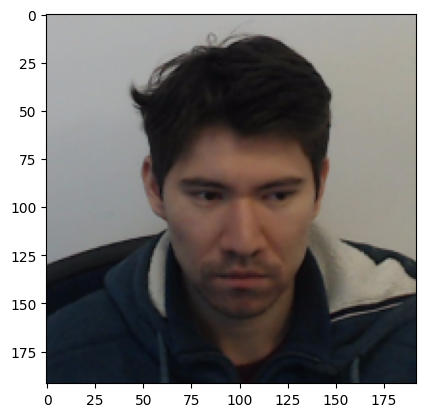

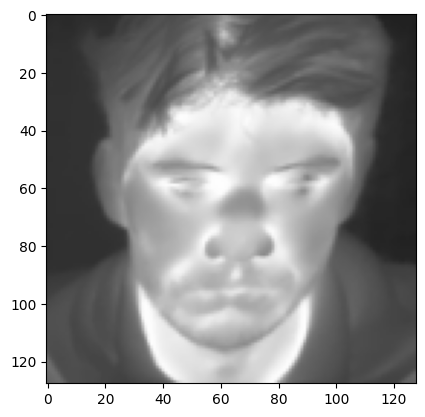

[[26, 23], [157, 28], [40, 162], [167, 165]]


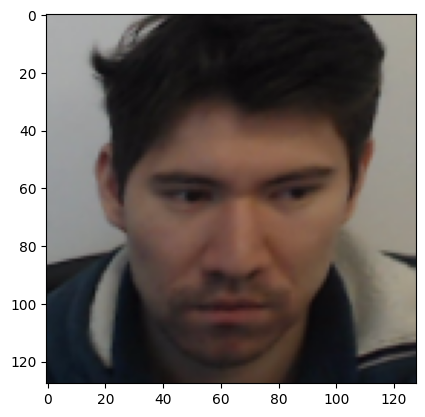

14_1_1_3_153.png


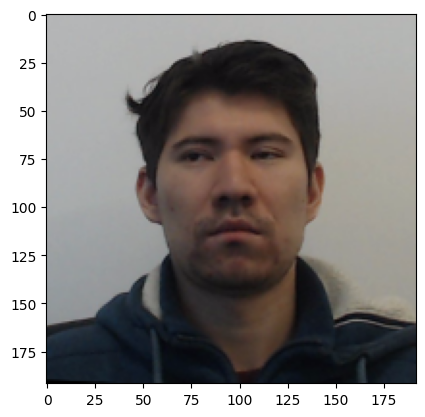

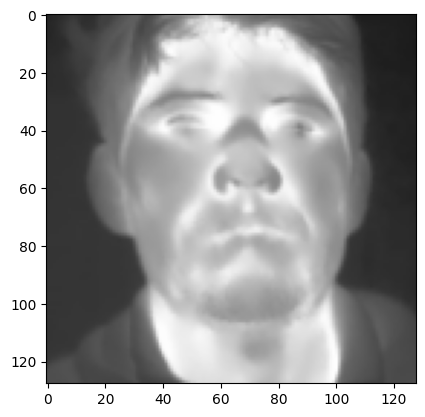

[[31, 39], [165, 28], [34, 153], [157, 161]]


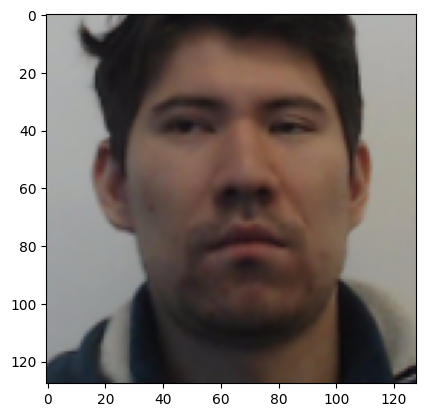

14_1_1_4_267.png


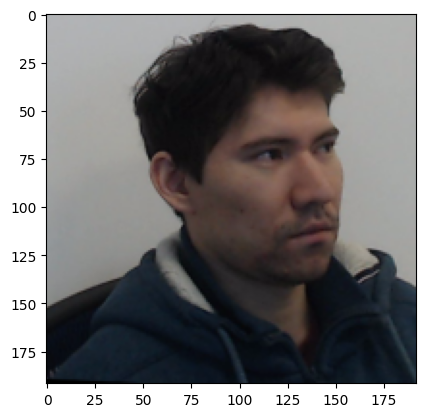

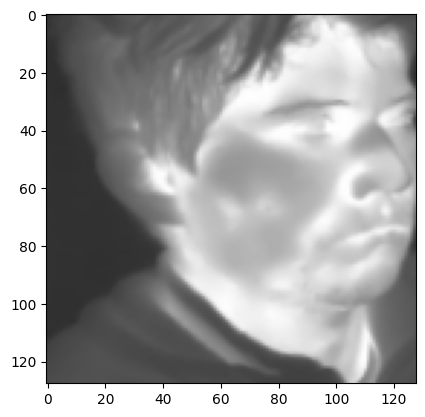

[[40, 34], [150, 33], [40, 150], [151, 168]]


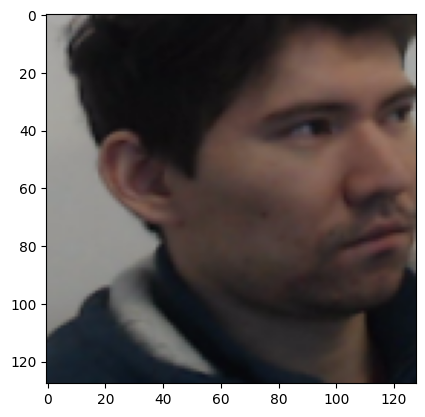

14_1_1_3_592.png


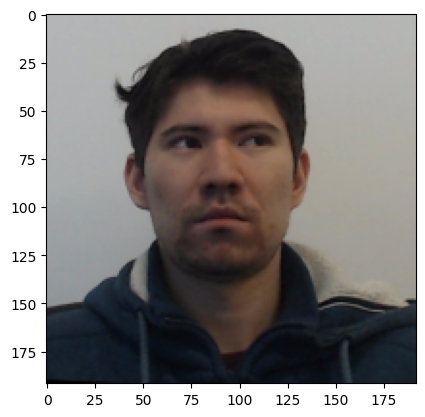

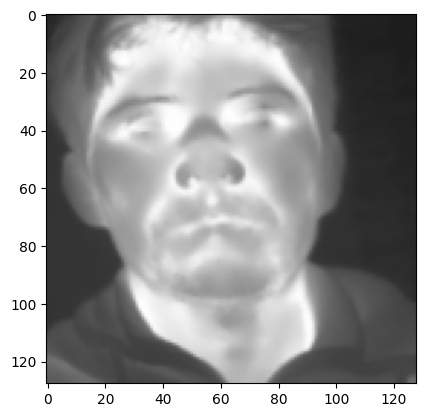

[[41, 22], [162, 36], [22, 163], [154, 166]]


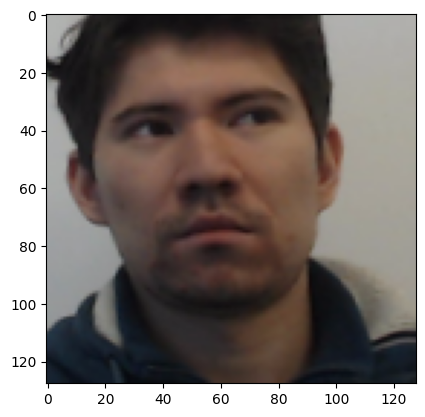

14_1_1_5_446.png


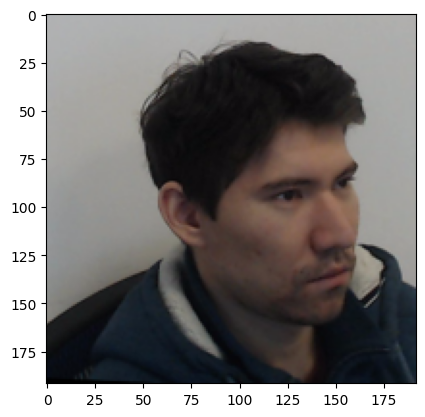

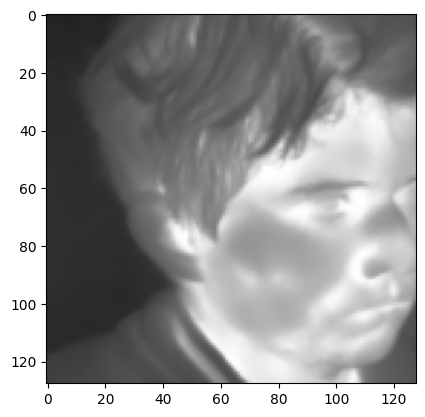

[[39, 28], [151, 31], [25, 161], [161, 163]]


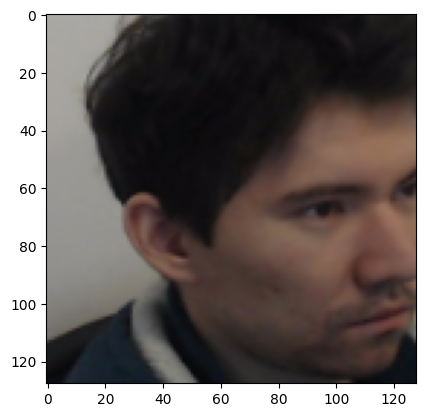

14_1_1_7_137.png


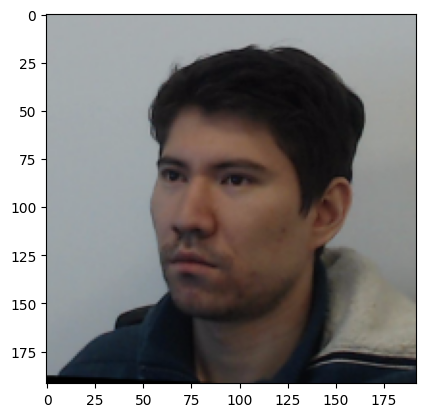

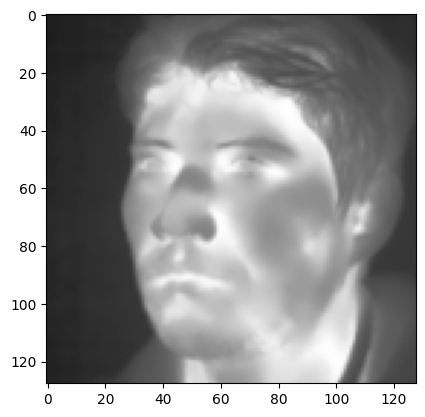

[[26, 24], [167, 25], [28, 159], [158, 162]]


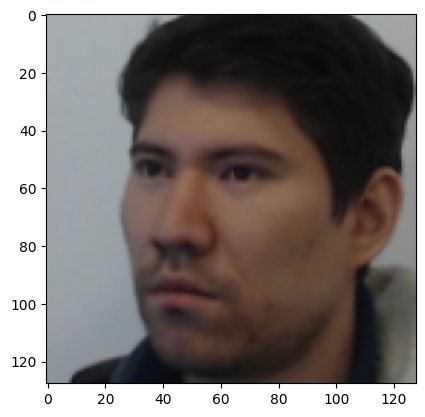

14_1_1_9_23.png


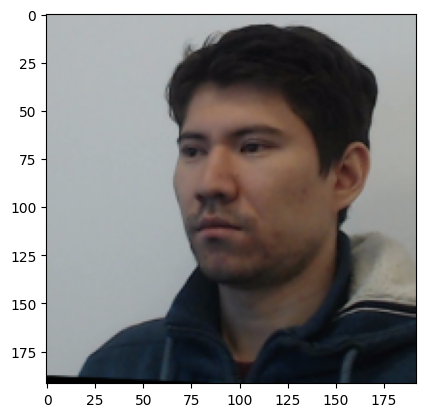

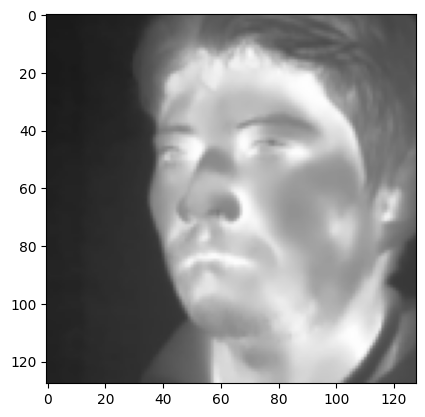

[[27, 23], [158, 24], [25, 161], [160, 150]]


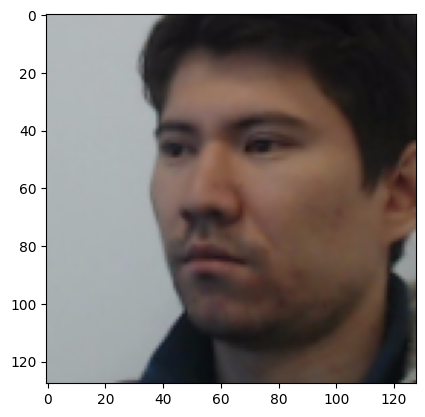

14_1_1_6_334.png


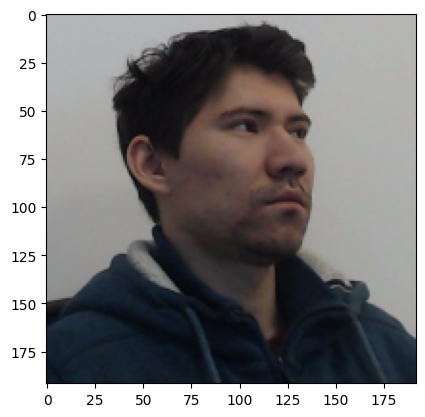

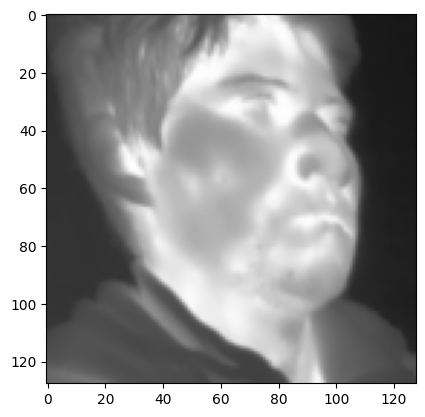

[[31, 29], [164, 24], [22, 154], [155, 152]]


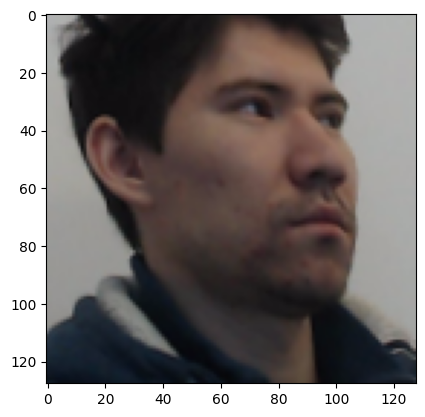

14_1_1_4_752.png


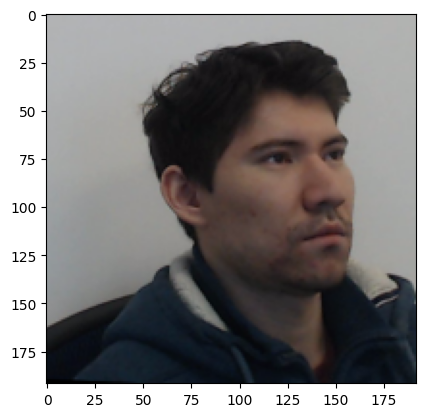

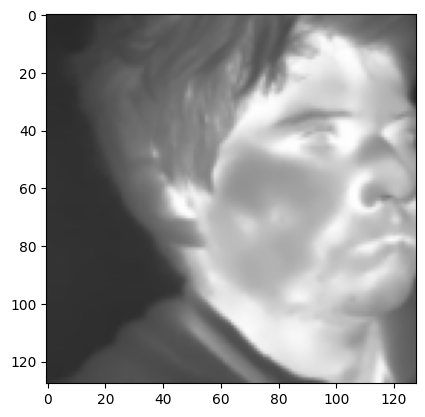

[[40, 32], [154, 31], [35, 150], [153, 166]]


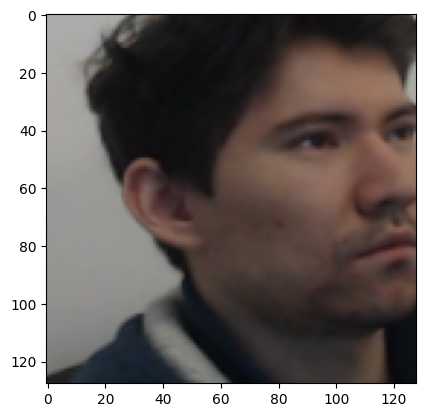

14_1_1_7_351.png


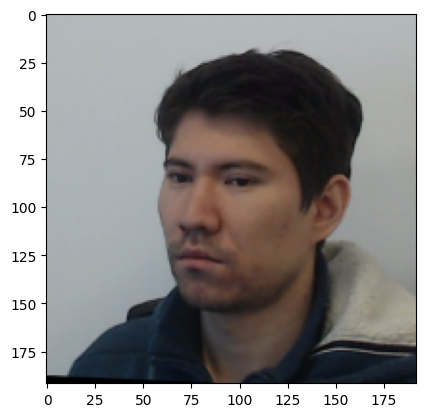

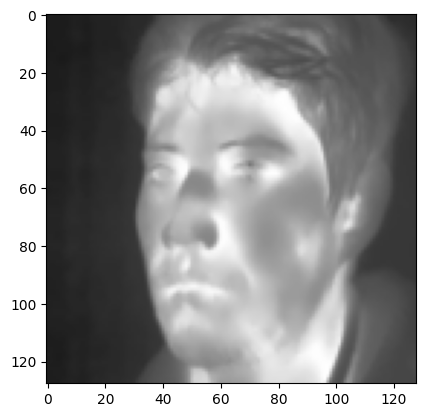

[[22, 29], [167, 41], [23, 155], [166, 160]]


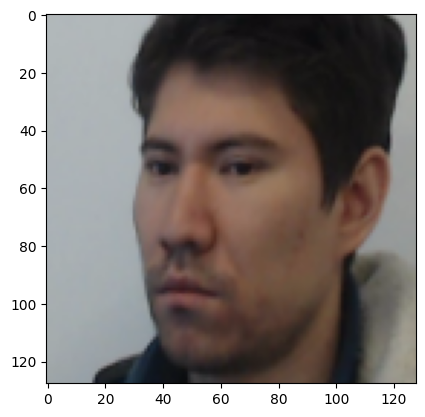

In [35]:
import random
# Review some images
no_imgs = len(os.listdir('./train_rgb_input'))
train_rgb_dir = './train_rgb_input'
train_thr_dir = './train_thr_template'
train_labels_dir = './train_labels'

for _ in range(10):
    rand_idx = random.randint(0, no_imgs)
    rand_img_file = os.listdir(train_rgb_dir)[rand_idx]
    print(rand_img_file)
    rgb = cv2.cvtColor(cv2.imread(os.path.join(train_rgb_dir, rand_img_file)), cv2.COLOR_RGB2BGR)
    plt.imshow(rgb)
    plt.show()
    
    thr = cv2.imread(os.path.join(train_thr_dir, rand_img_file))
    plt.imshow(thr)
    plt.show()
    
    with open(os.path.join(train_labels_dir, os.path.splitext(rand_img_file)[0] + '_label.txt'), 'r') as outfile:
        data = json.load(outfile)
    u_list=[data['location'][0]['top_left_u'],data['location'][1]['top_right_u'],data['location'][3]['bottom_right_u'],data['location'][2]['bottom_left_u']]
    v_list=[data['location'][0]['top_left_v'],data['location'][1]['top_right_v'],data['location'][3]['bottom_right_v'],data['location'][2]['bottom_left_v']]
    
    src_points=[
        [u_list[0], v_list[0]], 
        [u_list[1], v_list[1]], 
        [u_list[3], v_list[3]], 
        [u_list[2], v_list[2]]
               ]
    print(src_points)
    tgt_points=[[32,32],[159,32],[32,159],[159,159]]
    
    src_points=np.reshape(src_points,[4,1,2])
    tgt_points=np.reshape(tgt_points,[4,1,2])
    
    h_matrix, status = cv2.findHomography(src_points, tgt_points, 0)
    
    warped = cv2.warpPerspective(rgb, h_matrix, (192, 192))
    plt.imshow(warped[32:160, 32:160])
    plt.show()

In [36]:
'''
warp thermal images for validation set
'''
thermal_val = './homography/homography_thr_val'
rgb_val = './homography/homography_rgb_val'

if not (os.path.exists('./val_thr_template')):
    os.mkdir('./val_thr_template')
if not (os.path.exists('./val_labels')):
    os.mkdir('./val_labels')
if not (os.path.exists('./val_rgb_input')):
    os.mkdir('./val_rgb_input')

for img_file in os.listdir(thermal_val):
    thr_img = cv2.imread(os.path.join(thermal_val, img_file))
    rgb_img = cv2.imread(os.path.join(rgb_val, img_file))
    # crop the width such that it becomes a square
    height, width, channels = rgb_img.shape

    width_to_crop_per_side = (width - height) // 2
    rgb_img_sqr = rgb_img.copy()[:, width_to_crop_per_side:width - width_to_crop_per_side]
    thr_img_sqr = thr_img.copy()[:, width_to_crop_per_side:width - width_to_crop_per_side]
    # follow resizing of research paper
    rgb_img_resized = cv2.resize(rgb_img_sqr, (192, 192), interpolation=cv2.INTER_AREA)
    thr_img_resized = cv2.resize(thr_img_sqr, (192, 192), interpolation=cv2.INTER_AREA)
    # save new RGB image to input/
    cv2.imwrite(os.path.join('./val_rgb_input', img_file), rgb_img_resized)
    
    # get random points from corner boxes
    top_left_box_u=random.randint(22,41)
    top_left_box_v=random.randint(22,41)

    top_right_box_u=random.randint(150,169)
    top_right_box_v=random.randint(22,41)

    bottom_left_box_u=random.randint(22,41)
    bottom_left_box_v=random.randint(150,169)

    bottom_right_box_u=random.randint(150,169)
    bottom_right_box_v=random.randint(150,169)

    src_points = [[top_left_box_u,top_left_box_v],[top_right_box_u,top_right_box_v],[bottom_left_box_u,bottom_left_box_v],[bottom_right_box_u,bottom_right_box_v]]
    tgt_points = [[32,32],[159,32],[32,159],[159,159]] # hard coded
    
    src_points = np.reshape(src_points,[4,1,2])
    tgt_points = np.reshape(tgt_points,[4,1,2])
    
    # calculate homography
    h, status = cv2.findHomography(src_points, tgt_points, 0)
    warped_img = cv2.warpPerspective(thr_img_resized, h, (192, 192))
    # convert to grayscale because dataset thermal images are coloured
    warped_img = cv2.cvtColor(warped_img, cv2.COLOR_RGB2GRAY)
    cv2.imwrite(os.path.join('./val_thr_template', img_file), warped_img[32:160,32:160])
    
    label = {}
    label['location'] = []

    label['location'].append({
          'top_left_u':top_left_box_u,
          'top_left_v': top_left_box_v
      })
    label['location'].append({
          'top_right_u':top_right_box_u,
          'top_right_v':top_right_box_v
      })
    label['location'].append({
          'bottom_left_u':bottom_left_box_u,
          'bottom_left_v':bottom_left_box_v
      })
    label['location'].append({
          'bottom_right_u':bottom_right_box_u,
          'bottom_right_v':bottom_right_box_v
      })
    
    with open('./val_labels/' + os.path.splitext(img_file)[0] + '_label.txt', 'w') as outfile:
        json.dump(label, outfile)

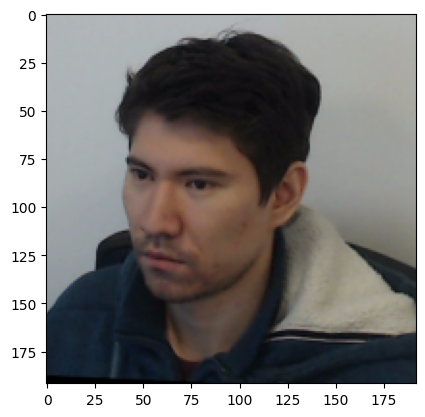

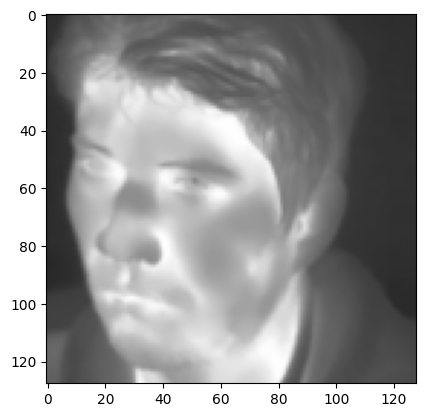

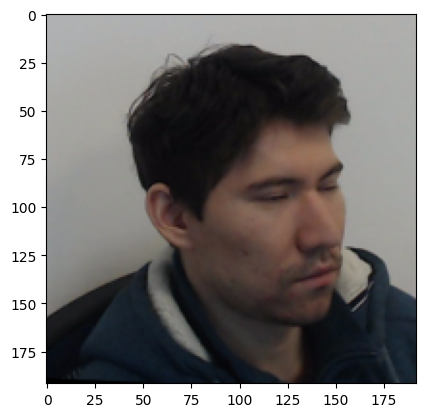

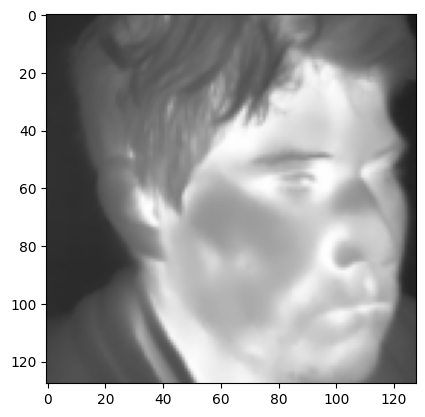

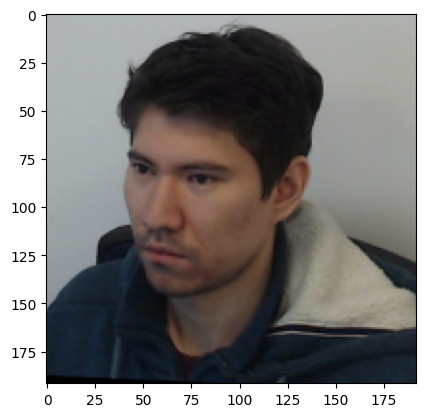

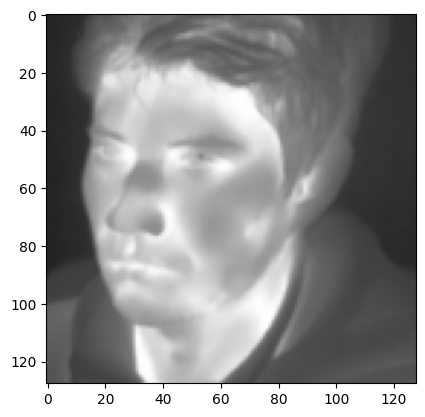

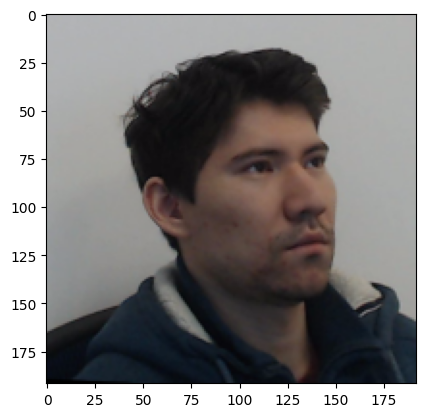

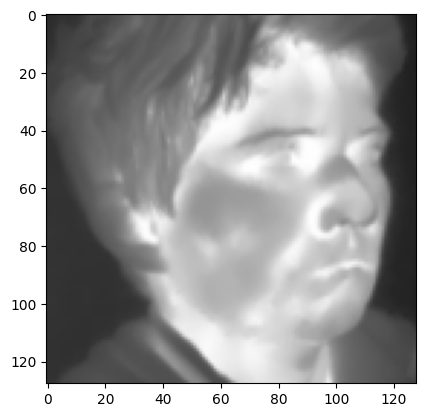

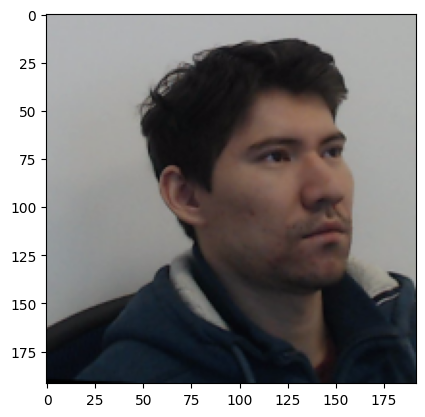

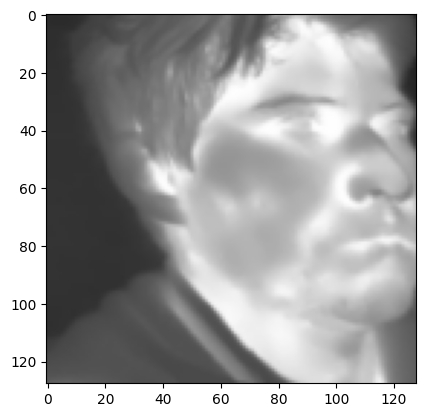

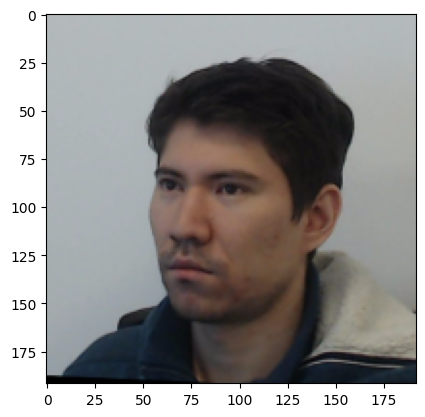

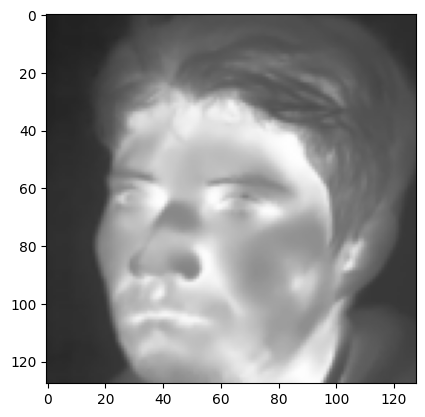

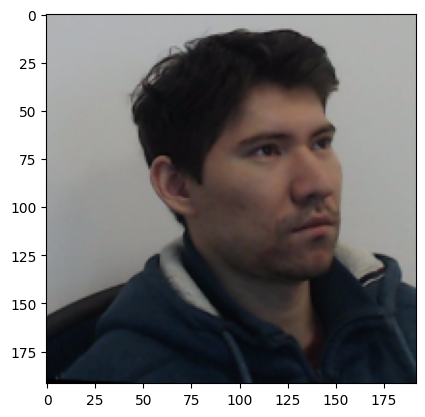

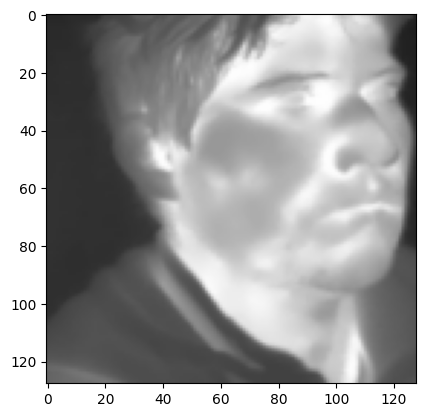

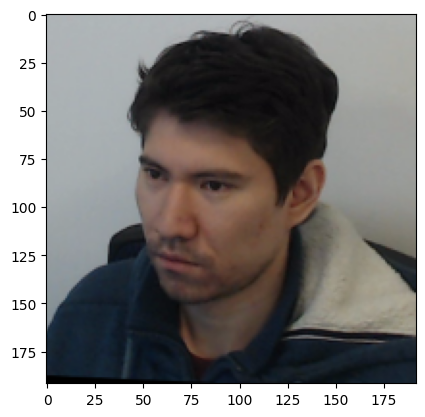

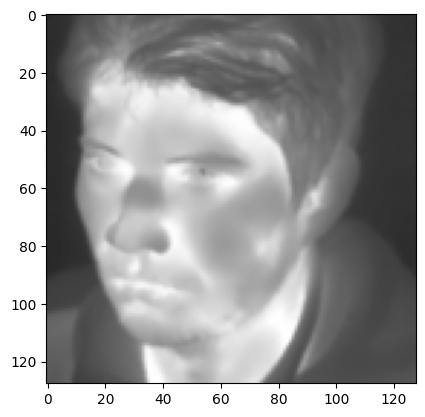

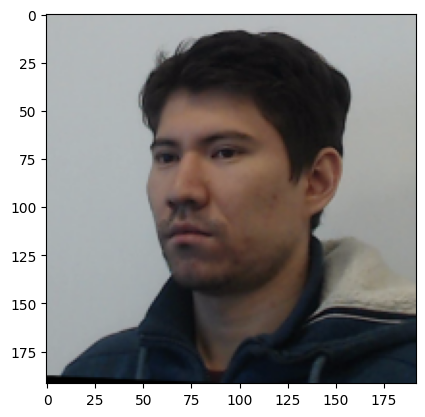

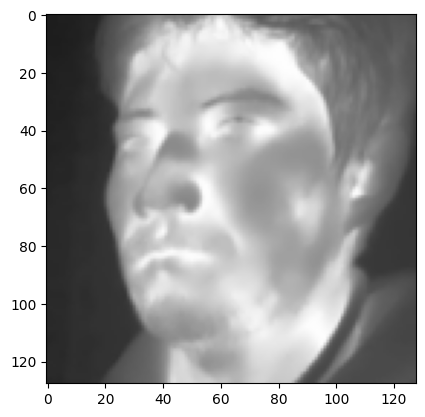

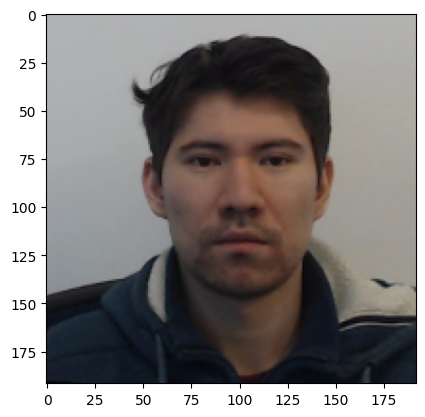

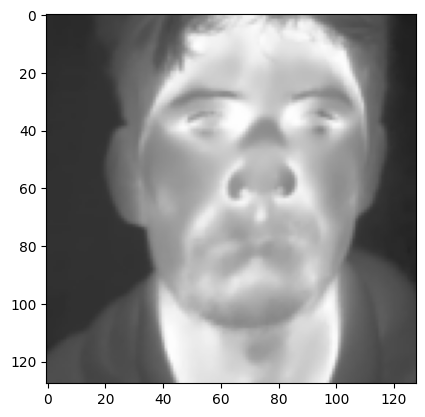

In [37]:
import random
# Review some images
no_imgs = len(os.listdir('./val_rgb_input'))
val_rgb_dir = './val_rgb_input'
val_thr_dir = './val_thr_template'

for _ in range(10):
    rand_idx = random.randint(0, no_imgs)
    rgb = cv2.cvtColor(cv2.imread(os.path.join(val_rgb_dir, os.listdir(val_rgb_dir)[rand_idx])), cv2.COLOR_RGB2BGR)
    plt.imshow(rgb)
    plt.show()
    
    thr = cv2.imread(os.path.join(val_thr_dir, os.listdir(val_thr_dir)[rand_idx]))
    plt.imshow(thr)
    plt.show()